In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
spark = SparkSession.builder.appName("SimpleApp").getOrCreate()
sc = spark.sparkContext
AWS_ACCESS_KEY="<elfamooskey>"
AWS_SECRET_KEY="<elfamosoaccess>"
hadoop_conf=sc._jsc.hadoopConfiguration()
hadoop_conf.set("fs.s3a.impl", "org.apache.hadoop.fs.s3native.NativeS3FileSystem")
hadoop_conf.set("fs.s3a.awsAccessKeyId", AWS_ACCESS_KEY)
hadoop_conf.set("fs.s3a.awsSecretAccessKey", AWS_SECRET_KEY)

In [146]:
rates = spark.read.parquet("s3a://yellowspark-us-new/rateCodes.df").orderBy("rate_code").toPandas()
rates

,rate_code,count
0,0,25118
1,1,162261262
2,2,2798053
3,3,9389
4,4,68387
5,6,654
6,7,22
7,8,2
8,9,13
9,15,1


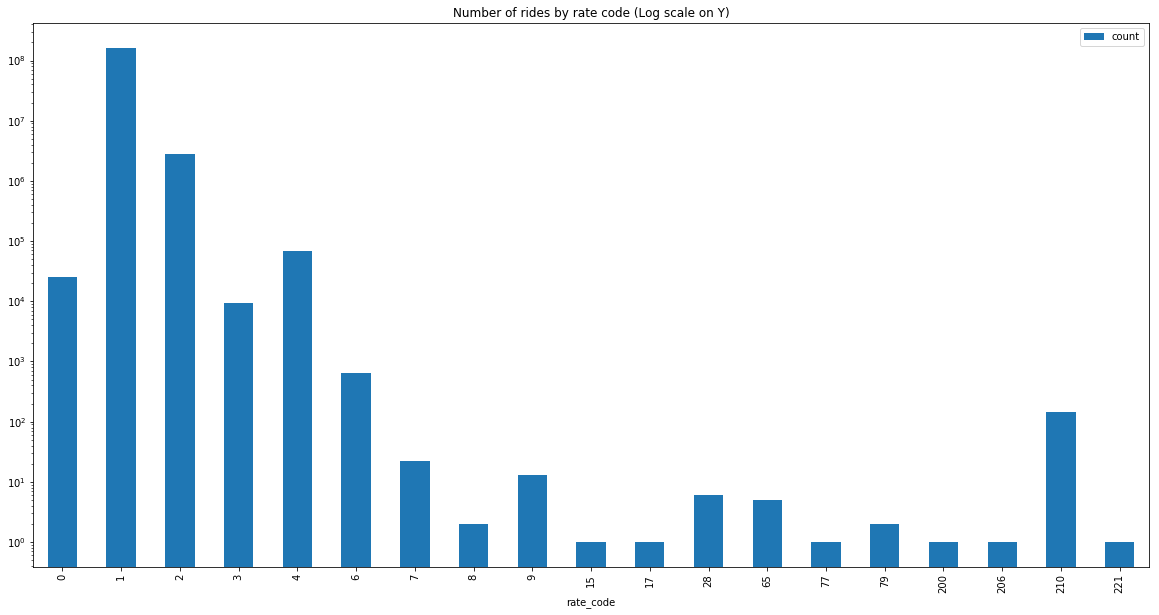

In [148]:
%matplotlib inline
rates.plot('rate_code','count',kind='bar',figsize=(20,10),logy=True, title="Number of rides by rate code (Log scale on Y)" )

# Pickups analysis

In [161]:
pickups = spark.read.parquet("s3a://yellowspark-us-new/pickups.df").orderBy("pickup_borough").toPandas()
pickups

,pickup_borough,avg_tip_amount,avg_trip_time_in_secs,avg_trip_distance_km,avg_taxi_revenue,count,sum_trip_time_in_secs,sum_trip_distance_km,sum_taxi_revenue,sum_passengers
0,Bronx,0.970373,802.749332,6.299737,15.453106,79671,63955842,5.019063e+05,1.231164e+06,133502
1,Brooklyn,1.611246,828.531645,5.919154,15.646201,4465376,3699705325,2.643125e+07,6.986617e+07,7711165
2,Manhattan,1.212928,707.542655,3.982161,12.249813,152533769,107924147929,6.074140e+08,1.868510e+09,260974620
3,Queens,3.589711,1616.845663,16.757651,35.500109,8081302,13066218093,1.354236e+08,2.868871e+08,14132437
4,Staten Island,1.418883,784.982343,5.862233,15.263365,2945,2311773,1.726428e+04,4.495061e+04,4031


In [166]:
pickupsWithPercent = spark.read.parquet("s3a://yellowspark-us-new/pickups.df").orderBy("pickup_borough").select('pickup_borough','count').withColumn('percent',expr('100 *(count / 165163063)')).toPandas()
pickupsWithPercent

,pickup_borough,count,percent
0,Bronx,79671,0.048238
1,Brooklyn,4465376,2.703617
2,Manhattan,152533769,92.353439
3,Queens,8081302,4.892923
4,Staten Island,2945,0.001783


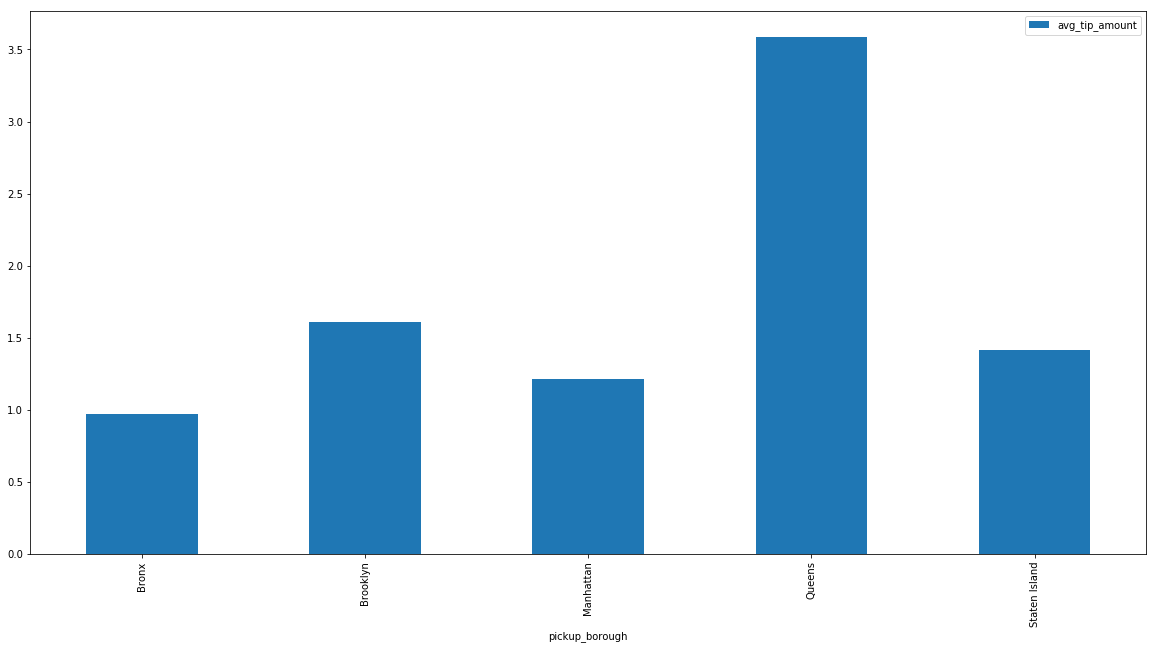

In [5]:
pickups.plot('pickup_borough','avg_tip_amount',kind='bar',figsize=(20,10))

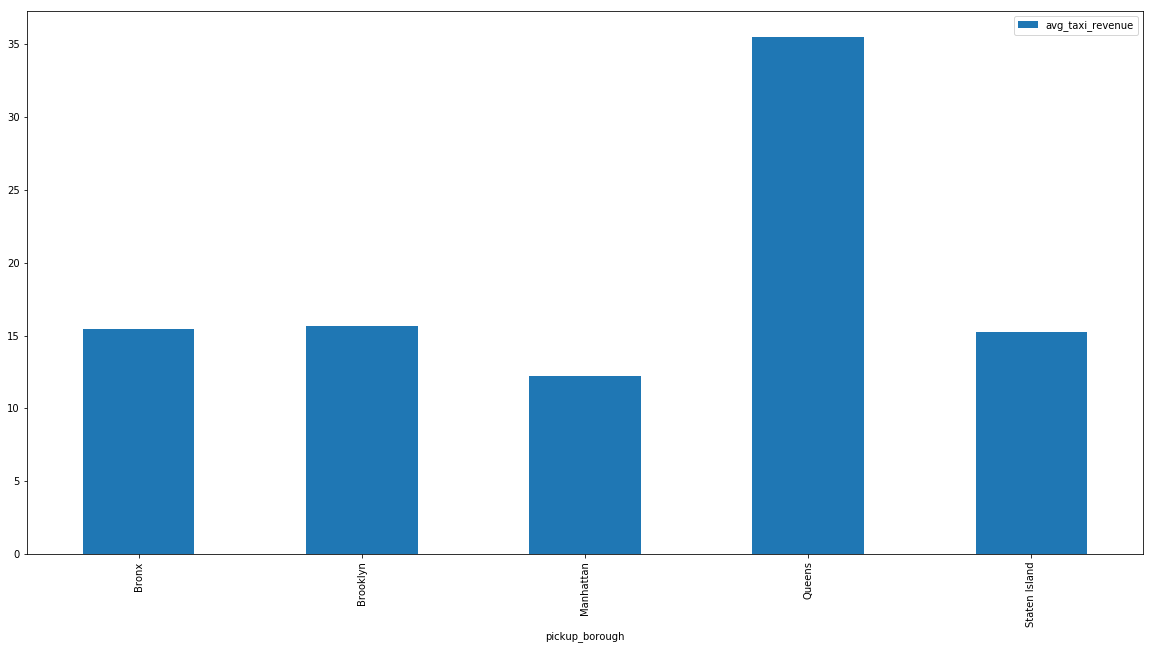

In [6]:
pickups.plot('pickup_borough','avg_taxi_revenue',kind='bar',figsize=(20,10),)

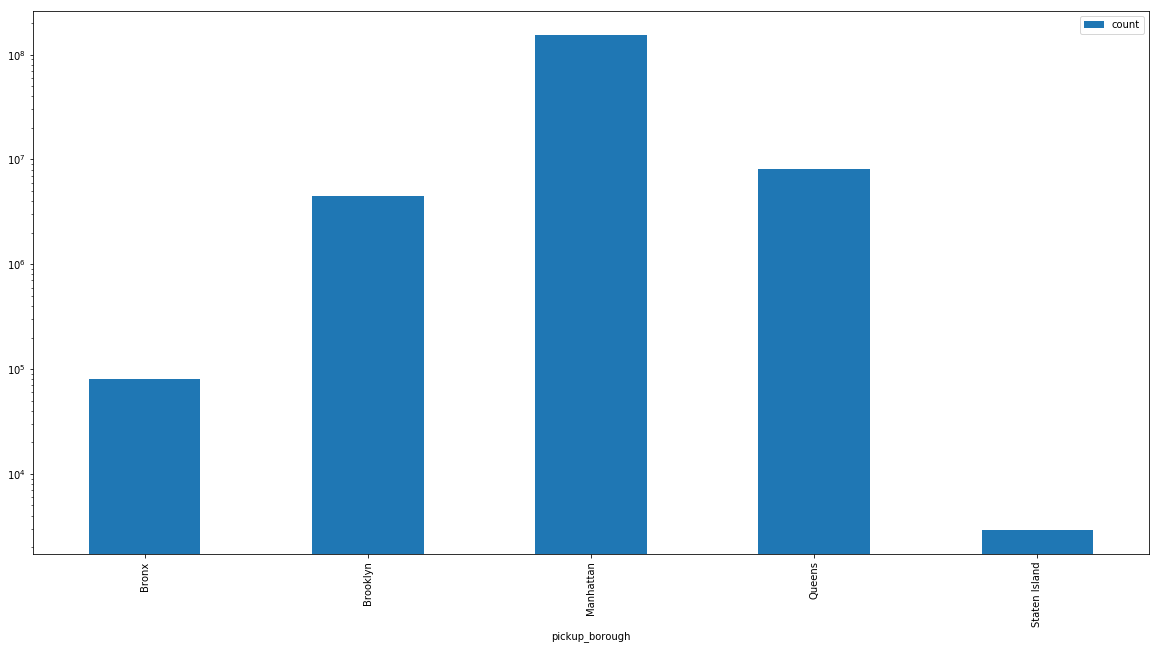

In [7]:
pickups.plot('pickup_borough','count',kind='bar',figsize=(20,10),logy=True)

# Dropoffs analysis

In [8]:
dropoffs = spark.read.parquet("s3a://yellowspark-us-new/dropoffs.df").orderBy("dropoff_borough").toPandas()
dropoffs

,dropoff_borough,avg_tip_amount,avg_trip_time_in_secs,avg_trip_distance_km,avg_taxi_revenue,count,sum_trip_time_in_secs,sum_trip_distance_km,sum_taxi_revenue,sum_passengers
0,Bronx,1.973362,1410.015729,15.779772,31.794414,791710,1116323553,1.249300e+07,2.517196e+07,1376750
1,Brooklyn,2.271768,1163.613742,9.072604,22.061593,9016736,10491997917,8.180528e+07,1.989236e+08,15523557
2,Manhattan,1.176279,690.870843,3.806695,11.894922,147151833,101662910946,5.601622e+08,1.750360e+09,251853641
3,Queens,3.175438,1396.671746,13.991036,30.611414,8169042,11409470155,1.142934e+08,2.500659e+08,14143043
4,Staten Island,6.525067,2241.609596,30.651487,59.819286,33742,75636391,1.034242e+06,2.018422e+06,58764


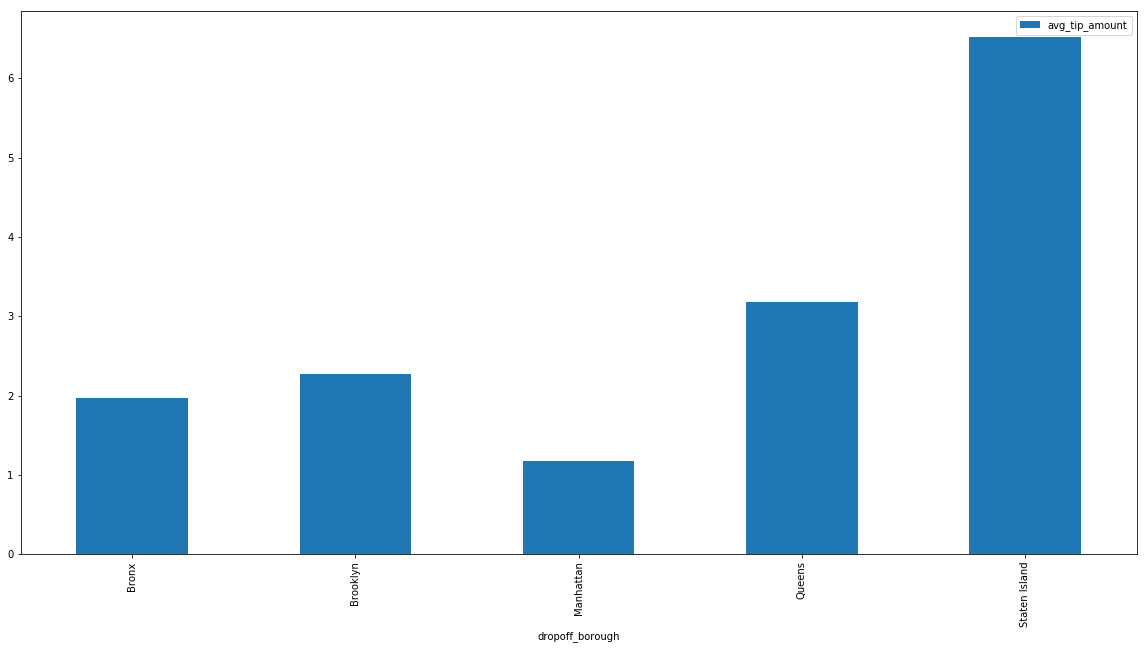

In [9]:
dropoffs.plot('dropoff_borough','avg_tip_amount',kind='bar',figsize=(20,10))

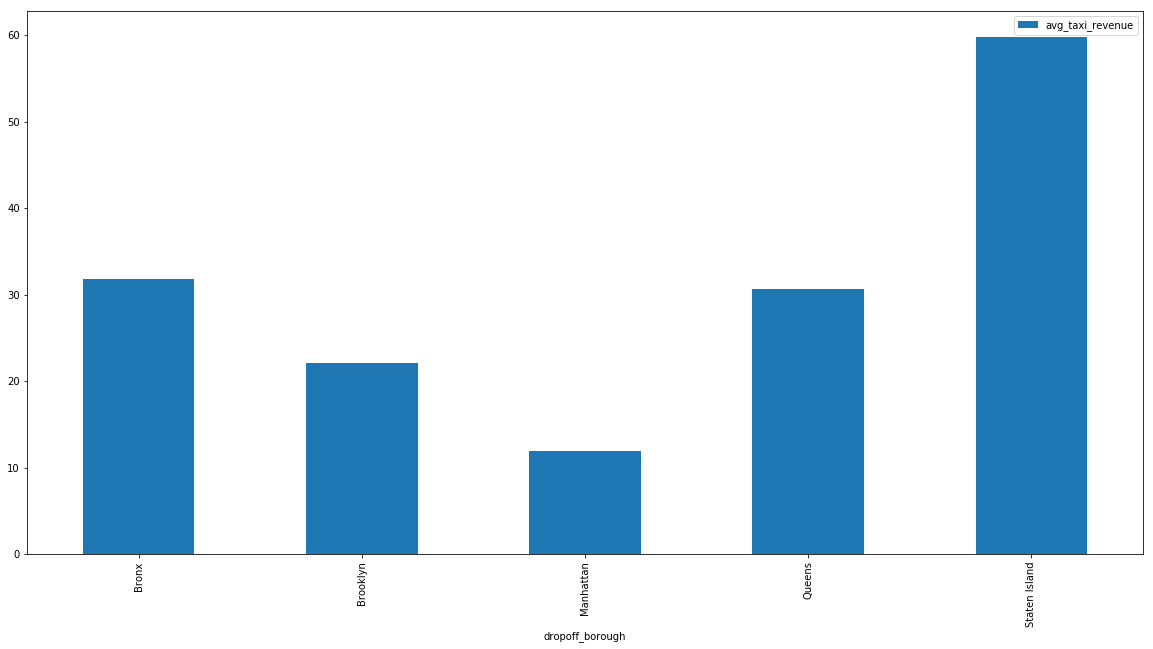

In [10]:
dropoffs.plot('dropoff_borough','avg_taxi_revenue',kind='bar',figsize=(20,10))

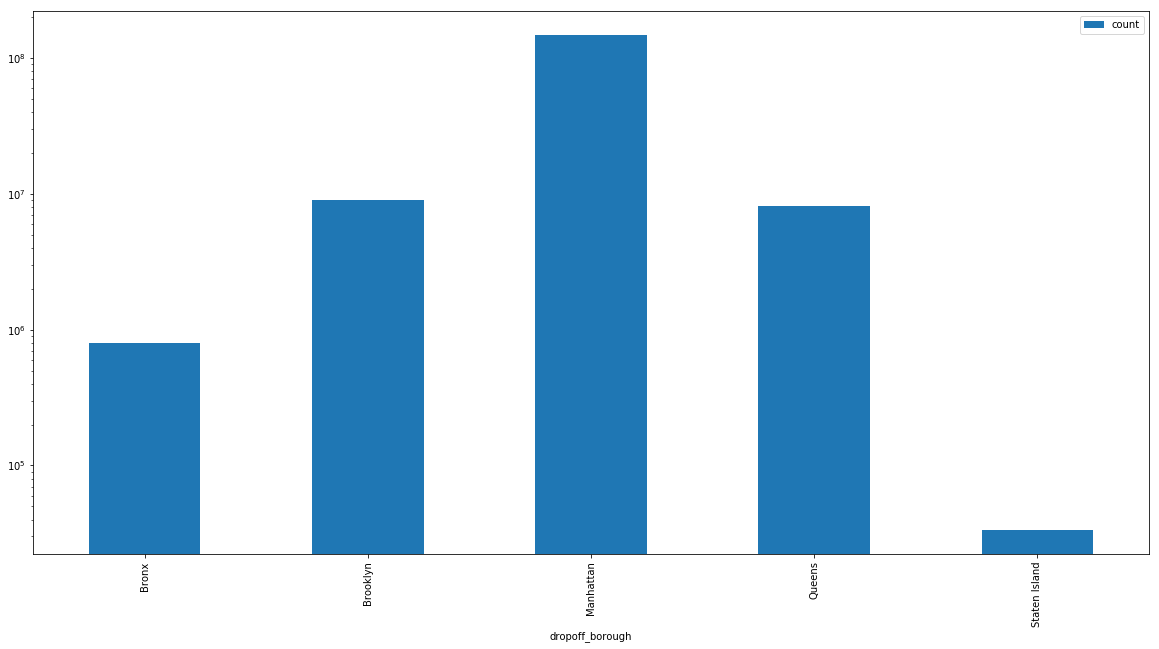

In [11]:
dropoffs.plot('dropoff_borough','count',kind='bar',figsize=(20,10),logy=True)

# Pairs of boroughs analysis

In [15]:
pairs = spark.read.parquet("s3a://yellowspark-us-new/boroughPairs.df").orderBy("pickup_borough","dropoff_borough")
pairsDF = pairs.toPandas()
pairsDF

,pickup_borough,dropoff_borough,avg_tip_amount,avg_trip_time_in_secs,avg_trip_distance_km,avg_taxi_revenue,count,sum_trip_time_in_secs,sum_trip_distance_km,sum_taxi_revenue
0,Bronx,Bronx,0.696861,620.118289,4.229875,11.606519,44966,27884239,1.902005e+05,5.218987e+05
1,Bronx,Brooklyn,2.959522,2213.331707,23.869778,47.123912,1025,2268665,2.446652e+04,4.830201e+04
2,Bronx,Manhattan,1.126020,960.428729,7.498773,17.893805,29879,28696650,2.240558e+05,5.346490e+05
3,Bronx,Queens,2.445706,1338.955133,16.537806,33.099309,3789,5073301,6.266175e+04,1.254133e+05
4,Bronx,Staten Island,2.575000,2748.916667,43.473638,75.116667,12,32987,5.216837e+02,9.014000e+02
5,Brooklyn,Bronx,3.115461,1981.485208,24.629559,47.420915,7335,14534194,1.806578e+05,3.478324e+05
6,Brooklyn,Brooklyn,1.095659,603.028177,3.941389,11.397421,2644357,1594621781,1.042244e+07,3.013885e+07
7,Brooklyn,Manhattan,2.264351,1143.082221,8.015304,20.654479,1543246,1764057066,1.236959e+07,3.187494e+07
8,Brooklyn,Queens,2.874433,1204.879837,12.734670,27.656176,268885,323974115,3.424162e+06,7.436331e+06
9,Brooklyn,Staten Island,4.709118,1621.486800,22.154259,43.926117,1553,2518169,3.440556e+04,6.821726e+04


In [16]:
pairs = pairs.withColumn("pair",format_string("%s => %s","pickup_borough","dropoff_borough"))
pairsDF = pairs.toPandas()

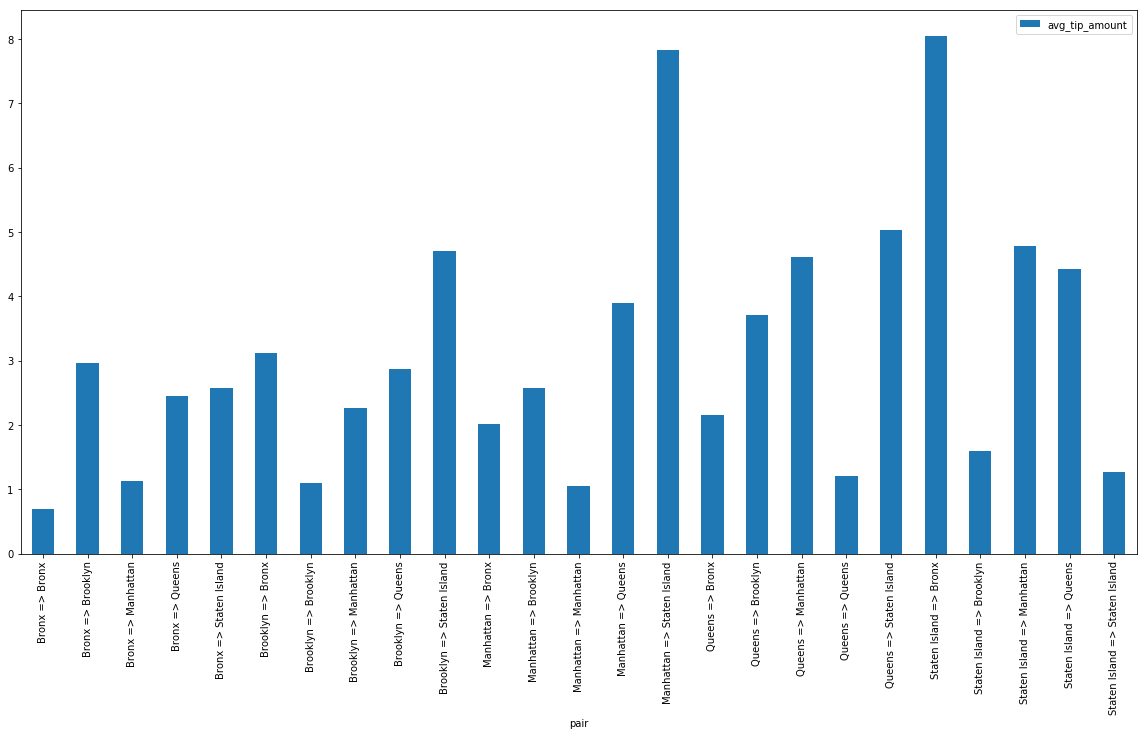

In [17]:
pairsDF.plot('pair','avg_tip_amount',kind='bar',figsize=(20,10))

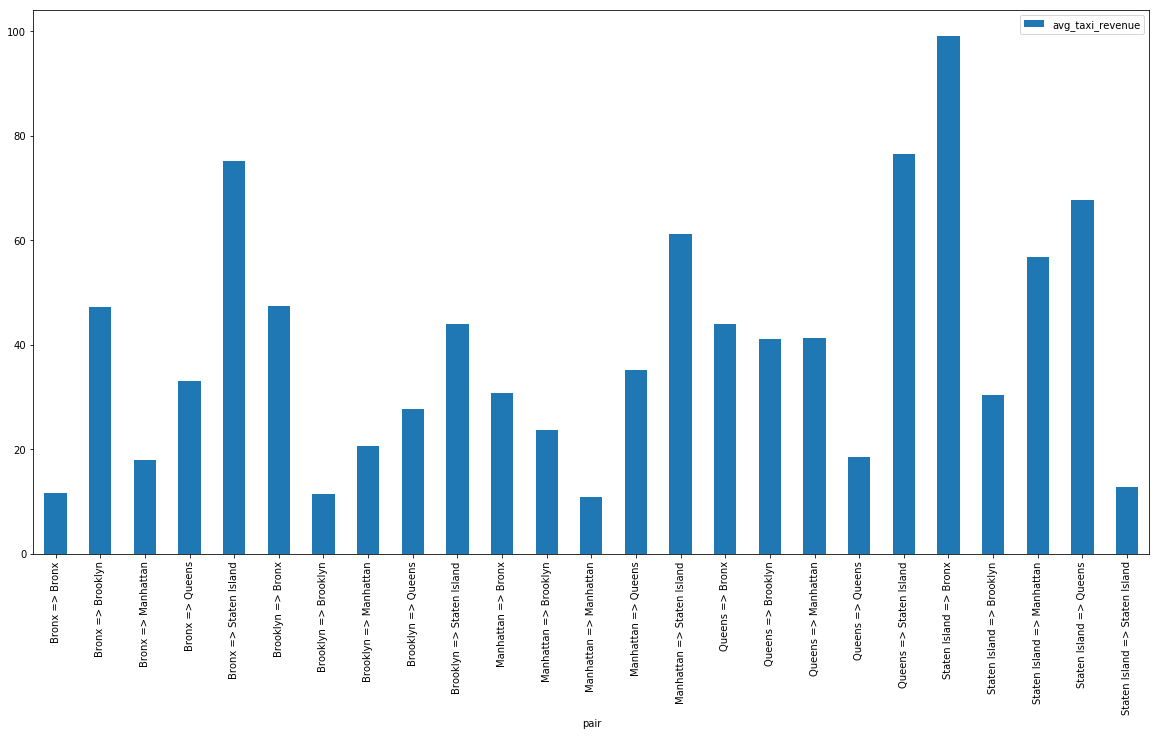

In [18]:
pairsDF.plot('pair','avg_taxi_revenue',kind='bar',figsize=(20,10))

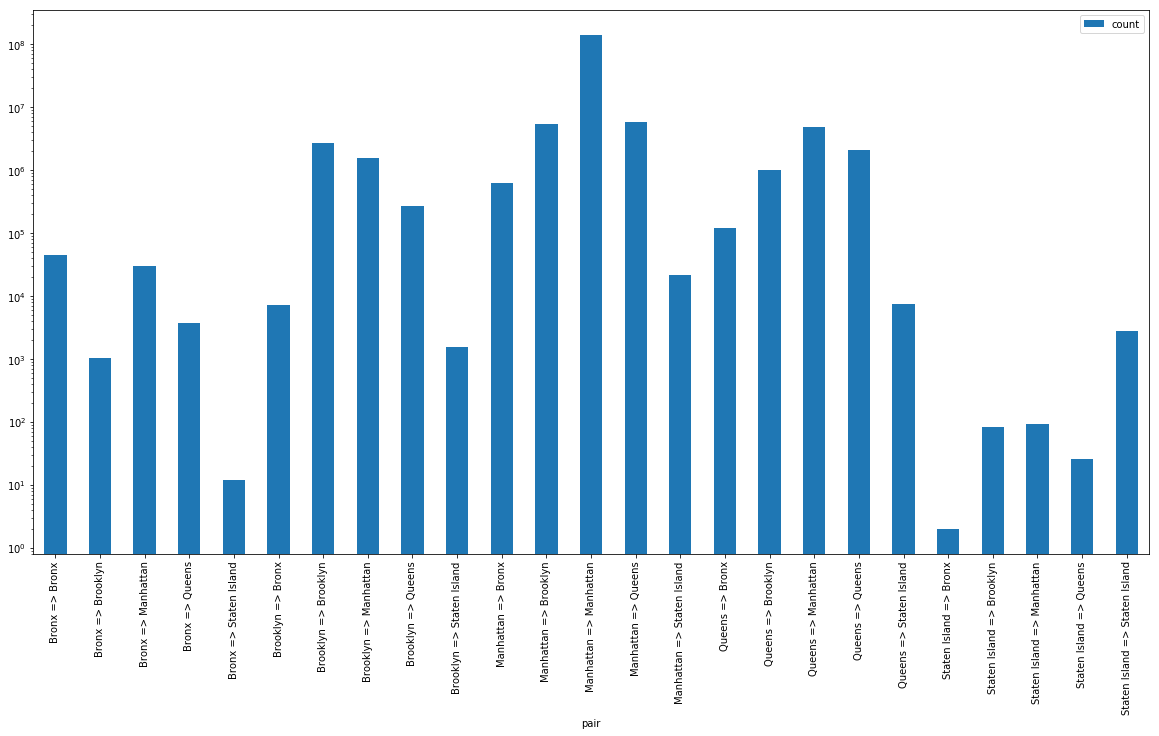

In [19]:
pairsDF.plot('pair','count',kind='bar',figsize=(20,10),logy=True)

# Hack Licenses analysis

In [20]:
topDrivers = spark.read.parquet("s3a://yellowspark-us-new/topDrivers.df")

In [21]:
topDrivers.count()

42528

In [22]:
topDriversPD = topDrivers.select('hack_license','total_revenue').orderBy(desc('total_revenue')).toPandas()
topDriversPD.head(20)

,hack_license,total_revenue
0,1EDF99EE9DAC182027330EF48828B54A,232793.64
1,D85749E8852FCC66A990E40605607B2F,216884.90
2,3AAB94CA53FE93A64811F65690654649,202361.98
3,51C1BE97280A80EBFA8DAD34E1956CF6,198695.23
4,23DF80C977D15141F11DD713C523C311,193247.51
5,3D757E111C78F5CAC83D44A92885D490,191275.70
6,C4B62F0697BC53B9859CD87B151B6BB1,185812.16
7,23F5E8FB4BC7E65E825E8484A596C45C,180608.82
8,AFC75912D19C0CB0D48A34412F0E03ED,178751.35
9,03173DD93C1171DA1788E6E7D733C5A9,177749.51


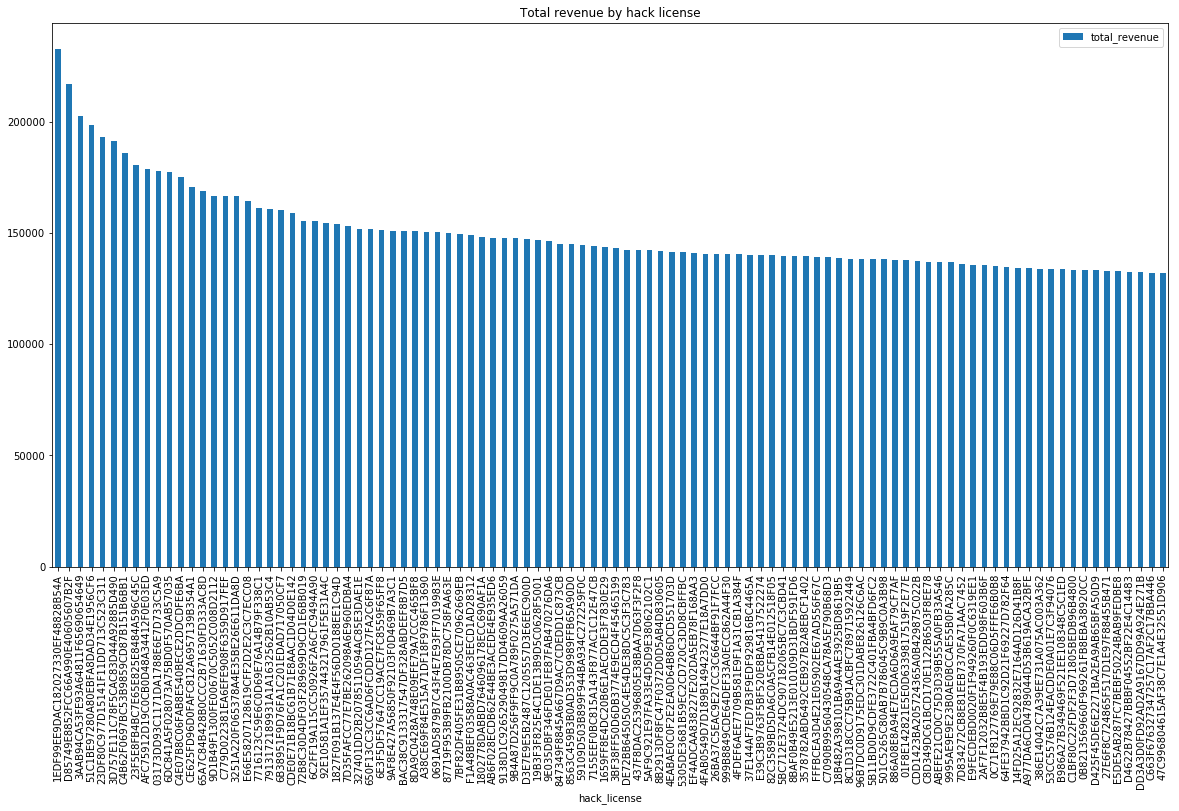

In [23]:
topDriversPD.head(100).plot('hack_license','total_revenue',kind='bar',figsize=(20,10), title="Total revenue by hack license")

In [24]:
topDriversPD = topDrivers.select('hack_license','total_tips').orderBy(desc('total_tips')).toPandas()
topDriversPD.head(20)

,hack_license,total_tips
0,D85749E8852FCC66A990E40605607B2F,20899.40
1,51C1BE97280A80EBFA8DAD34E1956CF6,20552.73
2,3AAB94CA53FE93A64811F65690654649,20257.48
3,AFC75912D19C0CB0D48A34412F0E03ED,19031.85
4,23DF80C977D15141F11DD713C523C311,18376.51
5,23F5E8FB4BC7E65E825E8484A596C45C,17955.82
6,C4E07B8C06FAB8E540BECE2DDCDFE6BA,17886.73
7,C4B62F0697BC53B9859CD87B151B6BB1,17854.06
8,3D757E111C78F5CAC83D44A92885D490,17636.70
9,65A7C84B428B0CCC2B71630FD333AC8D,17458.97


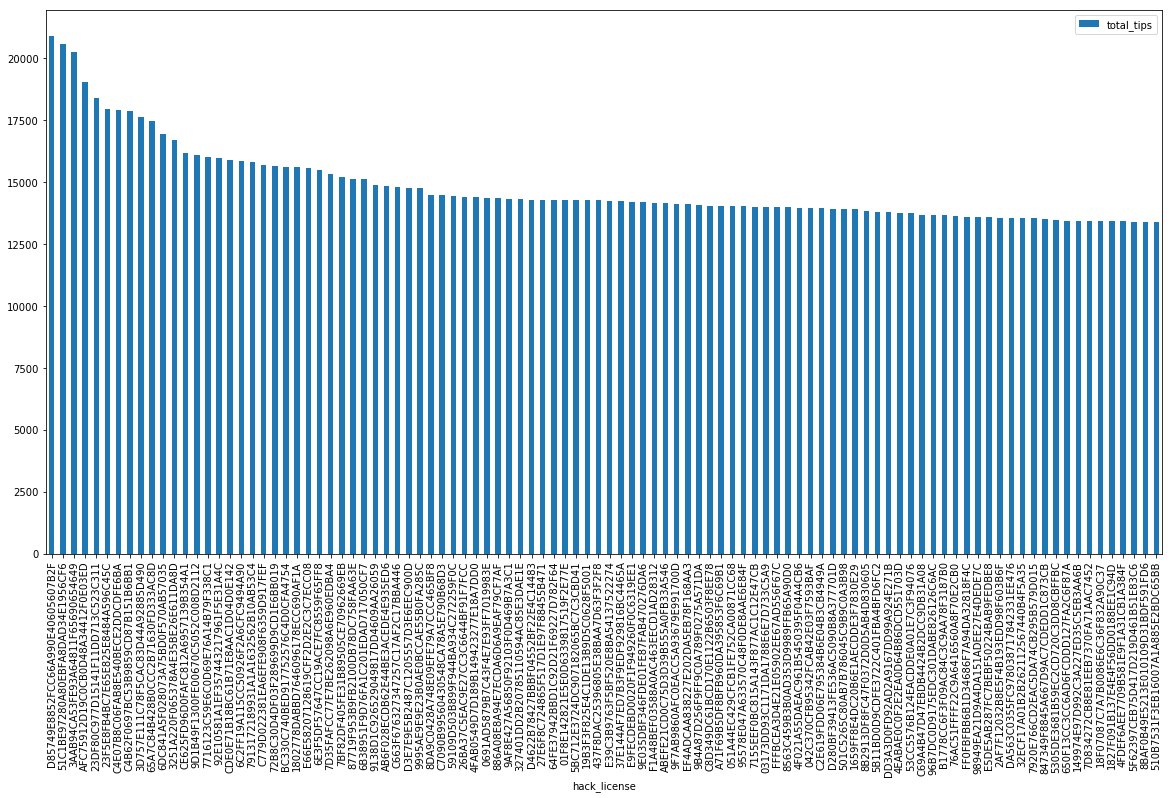

In [25]:
topDriversPD.head(100).plot('hack_license','total_tips',kind='bar',figsize=(20,10))

In [26]:
topDriversPD = topDrivers.select('hack_license','total_distance_km').orderBy(desc('total_distance_km')).toPandas()
topDriversPD.head(20)

,hack_license,total_distance_km
0,D85749E8852FCC66A990E40605607B2F,76390.541780
1,3AAB94CA53FE93A64811F65690654649,69162.513038
2,8C1D318CCC75B91ACBFC789715922449,67259.307554
3,51C1BE97280A80EBFA8DAD34E1956CF6,65834.768066
4,AFC75912D19C0CB0D48A34412F0E03ED,65127.897658
5,23DF80C977D15141F11DD713C523C311,62358.384452
6,23F5E8FB4BC7E65E825E8484A596C45C,62331.975183
7,6C2FF19A115CC50926F2A6CFC9494A90,62319.518891
8,6DC841A5F028073A75BD0F570AB57035,62190.594664
9,C4B62F0697BC53B9859CD87B151B6BB1,62084.474784


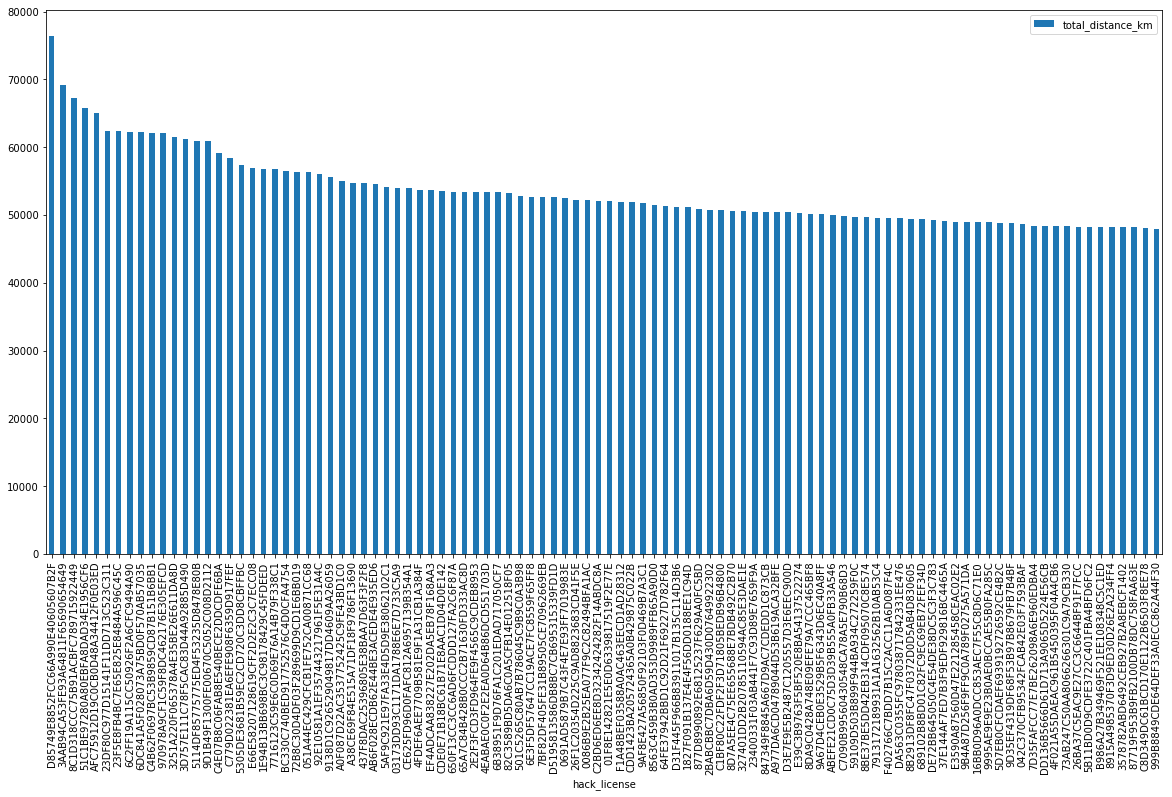

In [27]:
topDriversPD.head(100).plot('hack_license','total_distance_km',kind='bar',figsize=(20,10))

In [28]:
topDriversPD = topDrivers.select('hack_license','count').orderBy(desc('count')).toPandas()
topDriversPD.head(20)

,hack_license,count
0,51C1BE97280A80EBFA8DAD34E1956CF6,17110
1,D85749E8852FCC66A990E40605607B2F,16423
2,3D757E111C78F5CAC83D44A92885D490,15905
3,23DF80C977D15141F11DD713C523C311,15885
4,03173DD93C1171DA1788E6E7D733C5A9,15643
5,3AAB94CA53FE93A64811F65690654649,14964
6,CE625FD96D0FAFC812A6957139B354A1,14223
7,23F5E8FB4BC7E65E825E8484A596C45C,13924
8,C4B62F0697BC53B9859CD87B151B6BB1,13836
9,BAC38C9133317547DF328ABDEEF8B7D5,13685


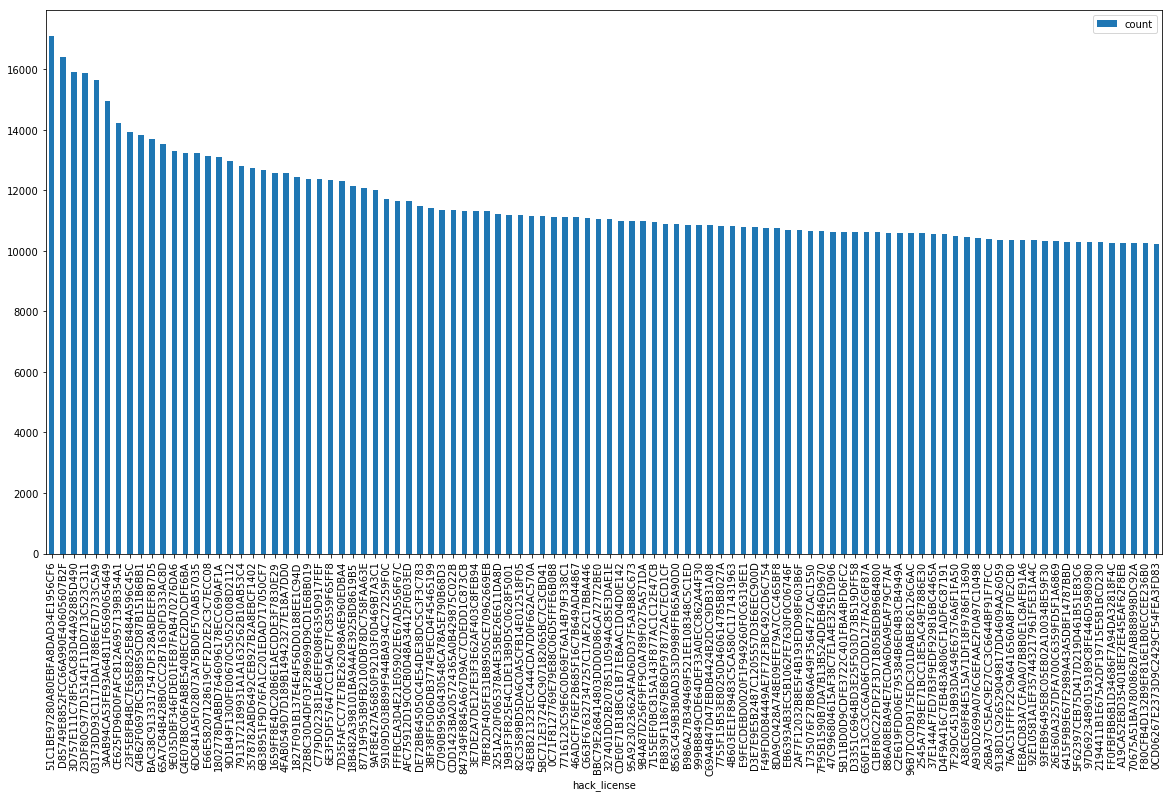

In [29]:
topDriversPD.head(100).plot('hack_license','count',kind='bar',figsize=(20,10))

In [30]:
topDriversPD = topDrivers.select('hack_license','total_duration').orderBy(desc('total_duration')).toPandas()
topDriversPD.head(20)

,hack_license,total_duration
0,D85749E8852FCC66A990E40605607B2F,11769072
1,3AAB94CA53FE93A64811F65690654649,11447323
2,3D757E111C78F5CAC83D44A92885D490,11404385
3,03173DD93C1171DA1788E6E7D733C5A9,11248181
4,51C1BE97280A80EBFA8DAD34E1956CF6,11107620
5,C4B62F0697BC53B9859CD87B151B6BB1,10977969
6,23DF80C977D15141F11DD713C523C311,10926631
7,23F5E8FB4BC7E65E825E8484A596C45C,10197057
8,65A7C84B428B0CCC2B71630FD333AC8D,10046263
9,6DC841A5F028073A75BD0F570AB57035,9961620


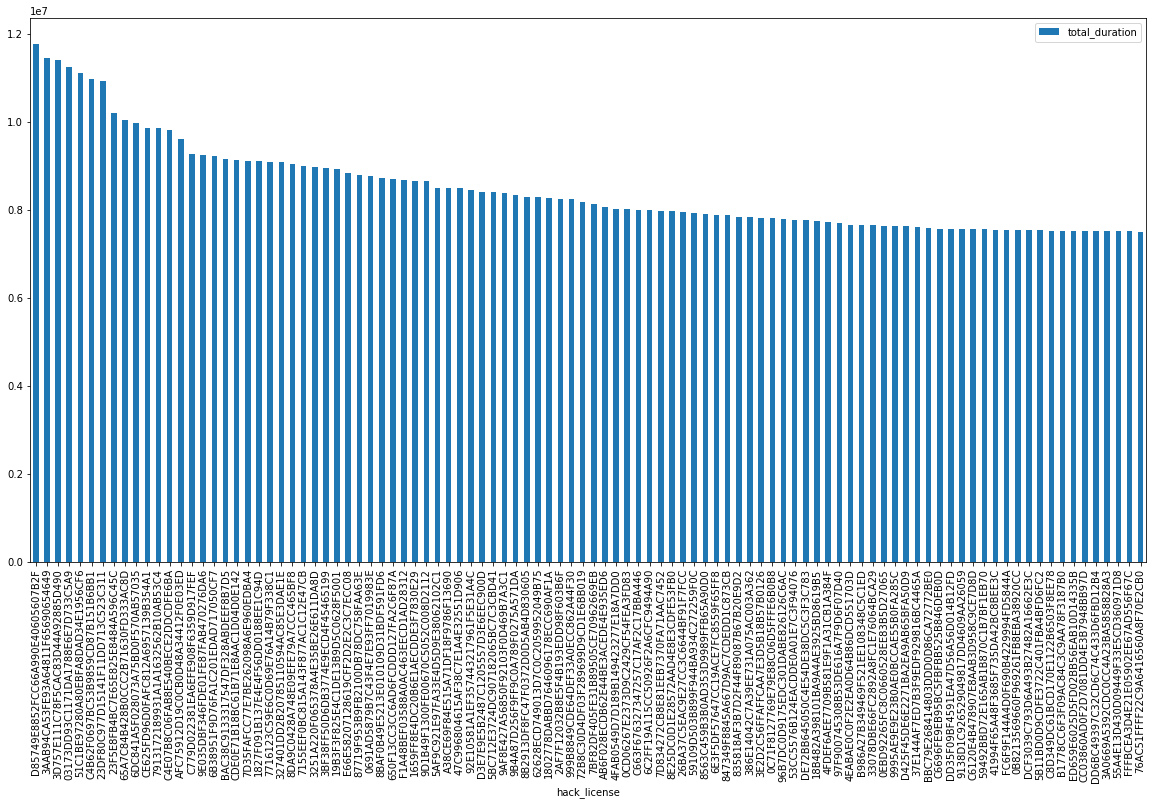

In [31]:
topDriversPD.head(100).plot('hack_license','total_duration',kind='bar',figsize=(20,10))

In [126]:
topDrivers = spark.read.parquet("s3a://yellowspark-us-new/topDrivers.df")

In [127]:
topDriversPD = topDrivers.select('hack_license','time_efficiency').orderBy(desc('time_efficiency')).toPandas()
topDriversPD.head(20)

,hack_license,time_efficiency
0,ECA1B12A5C8EA203D4FE74D11D0BF881,2.403226
1,47E338B3C082945EFF04DE6D65915ADE,2.166667
2,5616060FB8AE85D93F334E7267307664,1.538462
3,197636D970408B80F9A7736769BF548A,0.866667
4,6DE82A3D99C7935637ADC1AEA6430F52,0.311111
5,BA721F7DC14E1D7C93F30BB863E4B83C,0.288889
6,11966AAF529942B3907C0ECD88564215,0.250000
7,AD4660069108F79079A23D5E05358565,0.216667
8,021FF8A9BECC2EFF3B3EC40A10B397E6,0.173333
9,3DC4876F3F08201C7C76CB71FA1DA439,0.147059


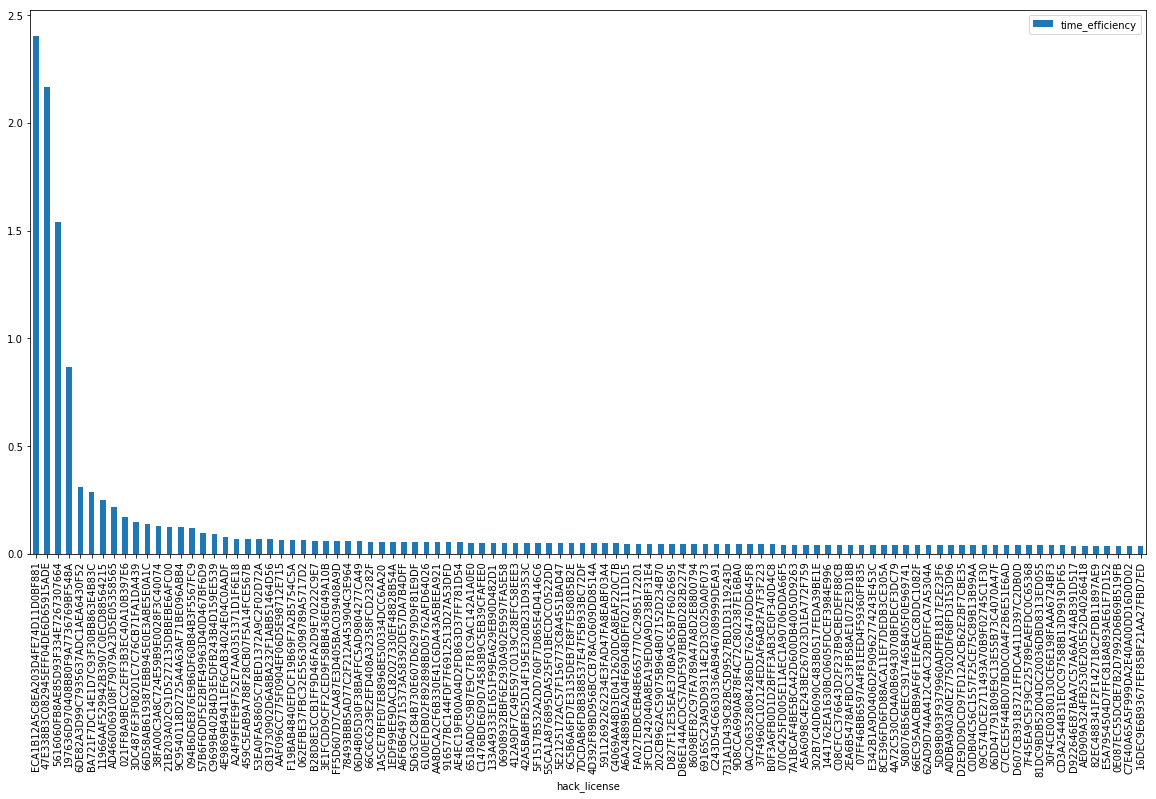

In [131]:
%matplotlib inline
topDriversPD.head(100).plot('hack_license','time_efficiency',kind='bar', figsize=(20,10))

In [132]:
topDriversPD = topDrivers.select('hack_license','distance_efficiency').orderBy(desc('distance_efficiency')).toPandas()
topDriversPD.head(20)

,hack_license,distance_efficiency
0,197636D970408B80F9A7736769BF548A,269.261519
1,47E338B3C082945EFF04DE6D65915ADE,161.556912
2,5616060FB8AE85D93F334E7267307664,124.274547
3,ECA1B12A5C8EA203D4FE74D11D0BF881,115.730672
4,AD4660069108F79079A23D5E05358565,97.913280
5,BA721F7DC14E1D7C93F30BB863E4B83C,89.753840
6,021FF8A9BECC2EFF3B3EC40A10B397E6,55.709280
7,6DE82A3D99C7935637ADC1AEA6430F52,51.935632
8,4A72C530CD4A0B6943070BFDECF3DC79,51.781061
9,A818856C3F2D4E752C7E4996F9C16569,49.448188


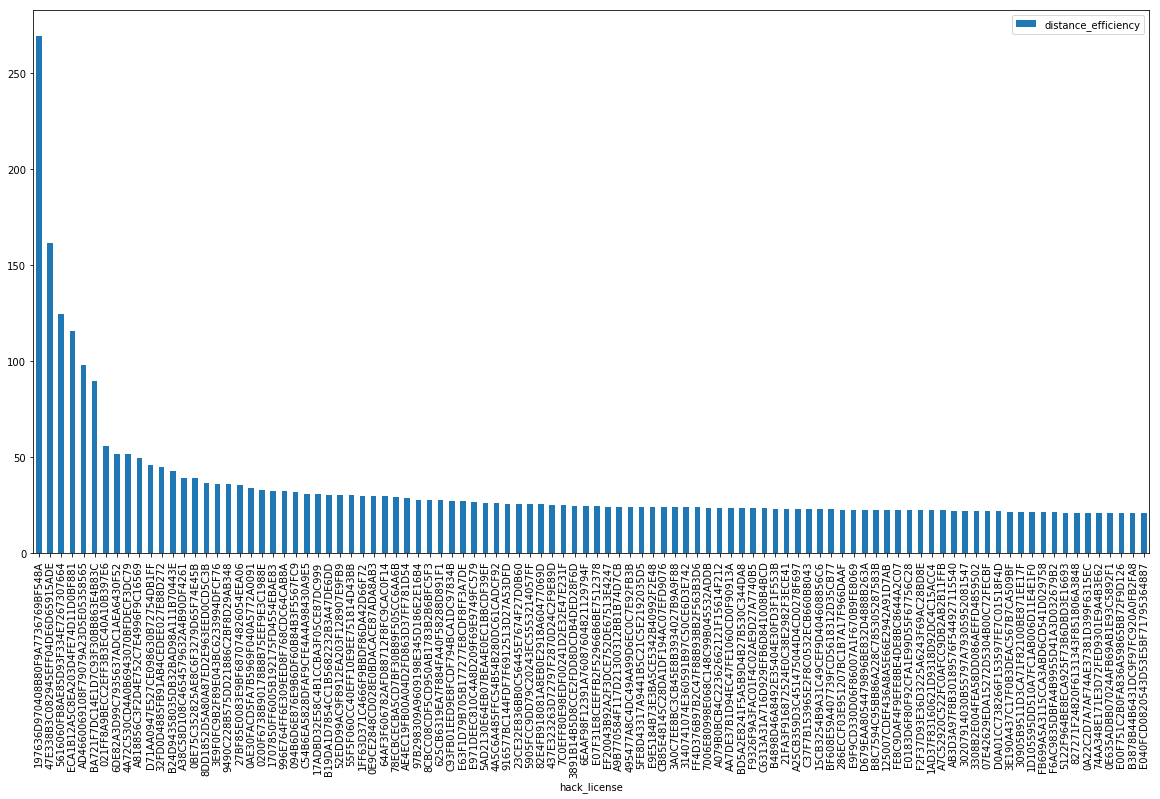

In [134]:
topDriversPD.head(100).plot('hack_license','distance_efficiency',kind='bar',figsize=(20,10))

# Medallions analysis

In [ ]:
topMedallions = spark.read.parquet("s3a://yellowspark-us-new/topMedallions.df")
topMedallionsPD = topMedallions.orderBy(desc('total_distance_km')).toPandas()

In [ ]:
topMedallionsPD.head(20)

In [ ]:
topMedallionsPD.head(100).plot('medallion','total_distance_km',kind='bar',figsize=(20,10))

# Day of year analysis

In [34]:
daysYear = spark.read.parquet("s3a://yellowspark-us-new/dayStats.df")
daysYearPD = daysYear.orderBy('day_year').toPandas()

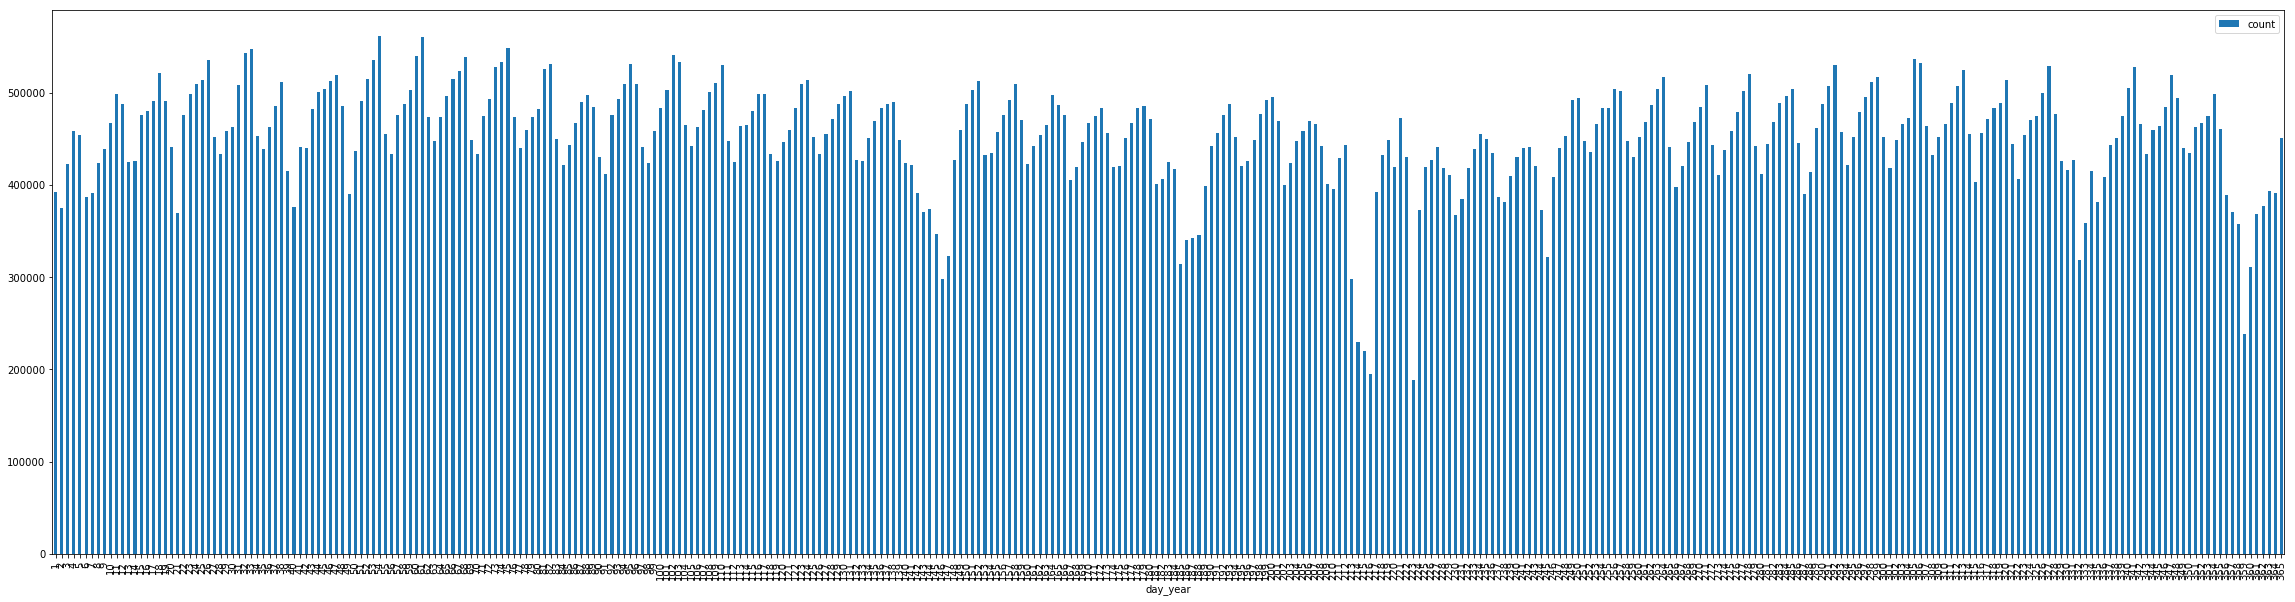

In [35]:
daysYearPD.plot('day_year','count',kind='bar',figsize=(40,10))

# Month analysis

In [36]:
months = spark.read.parquet("s3a://yellowspark-us-new/monthStats.df")
monthsPD = months.orderBy('month').toPandas()

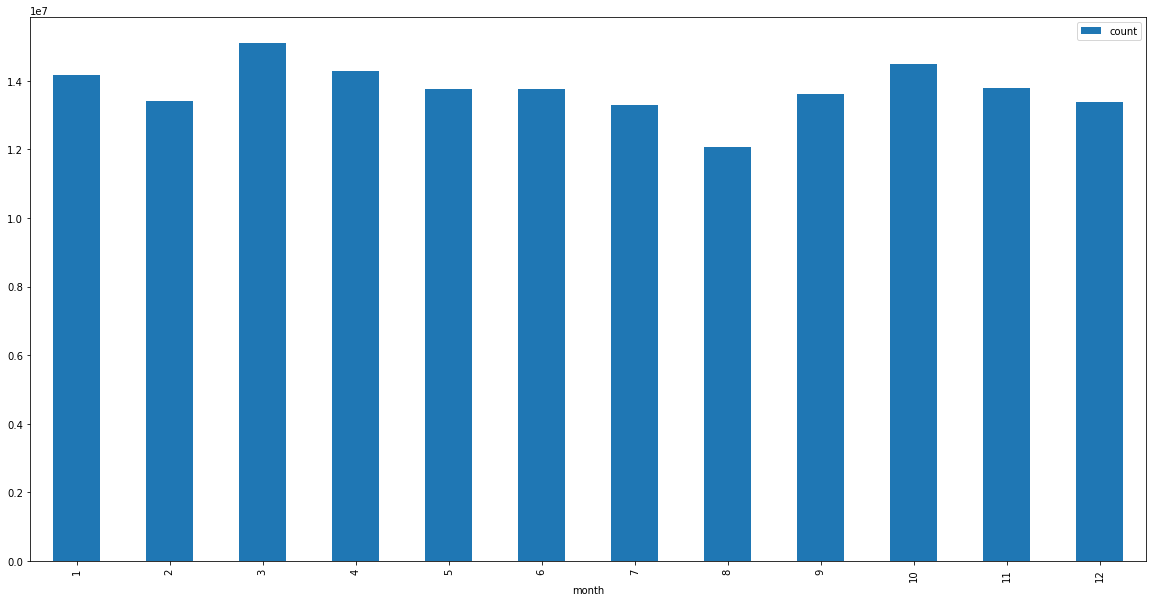

In [37]:
monthsPD.plot('month','count',kind='bar',figsize=(20,10))

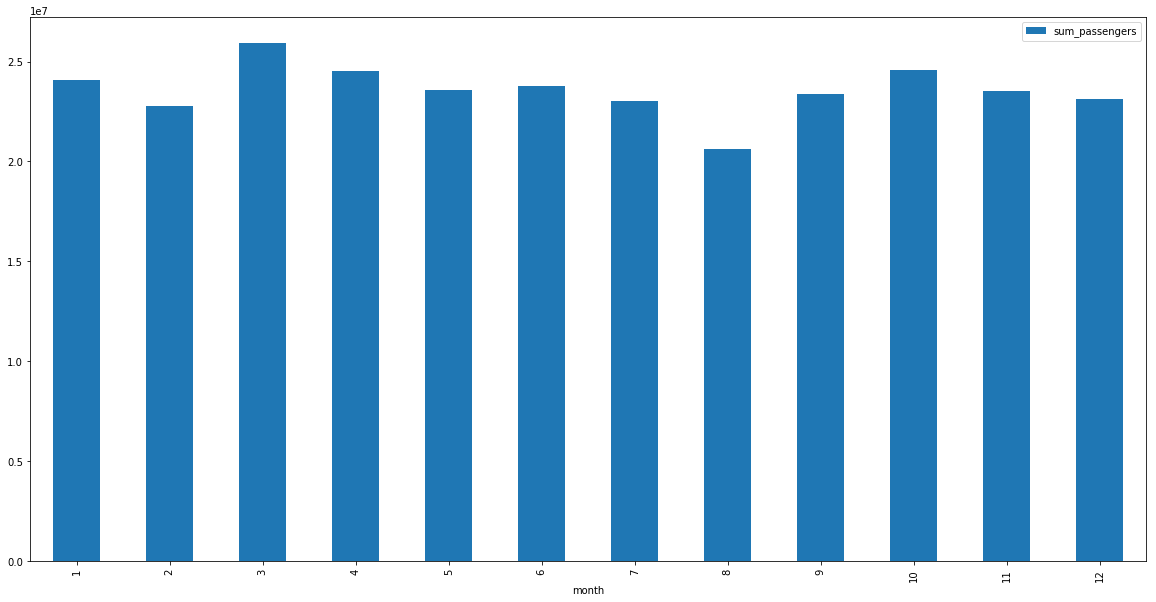

In [38]:
monthsPD.plot('month','sum_passengers',kind='bar',figsize=(20,10))

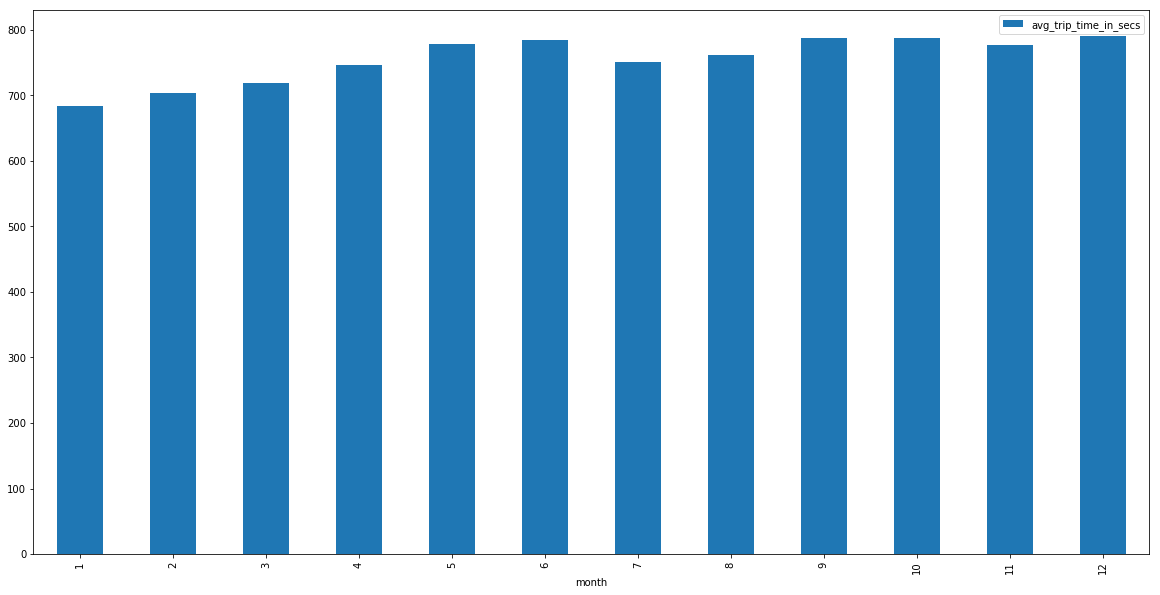

In [39]:
monthsPD.plot('month','avg_trip_time_in_secs',kind='bar',figsize=(20,10))

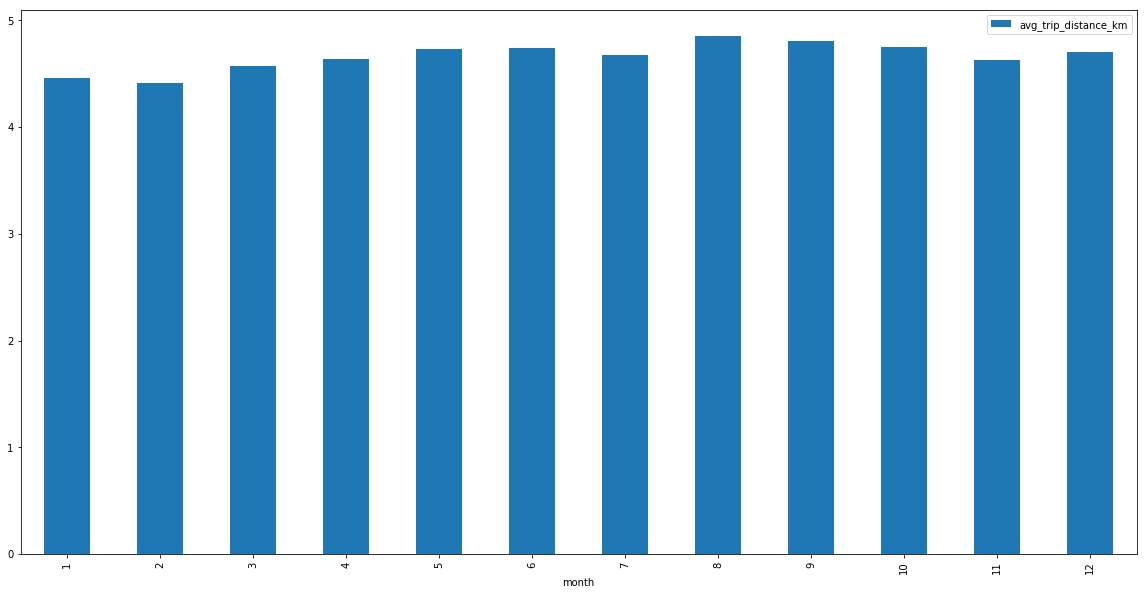

In [135]:
monthsPD.plot('month','avg_trip_distance_km',kind='bar',figsize=(20,10))

# Day of week analysis

In [40]:
daysWeek = spark.read.parquet("s3a://yellowspark-us-new/dayWeekStats.df")
daysWeekPD = daysWeek.orderBy('day_week').toPandas()

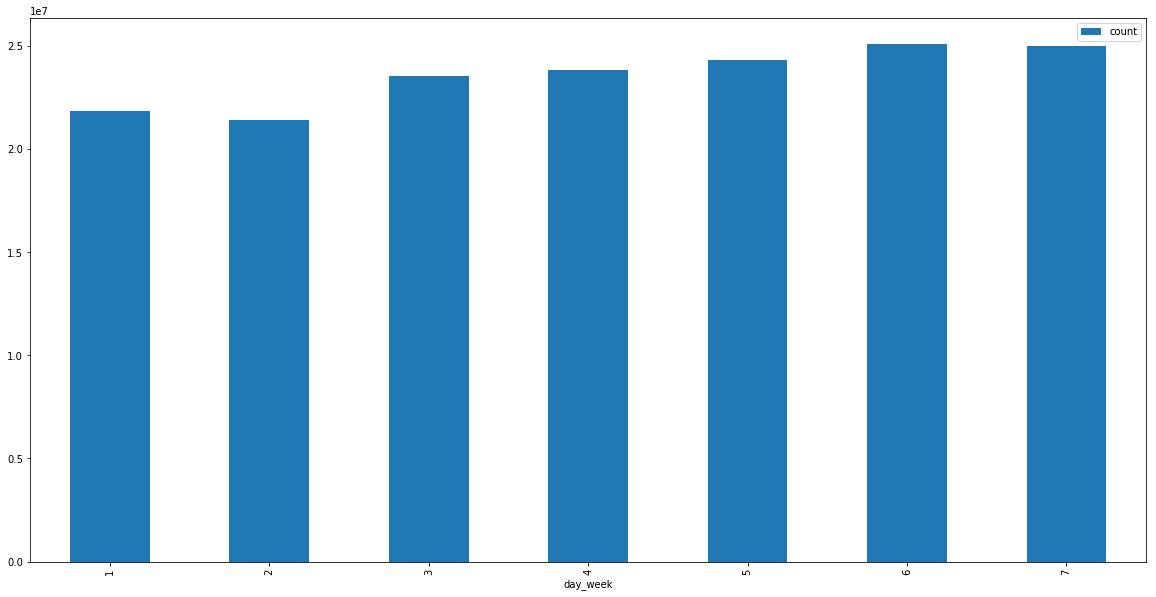

In [41]:
daysWeekPD.plot('day_week','count',kind='bar',figsize=(20,10))

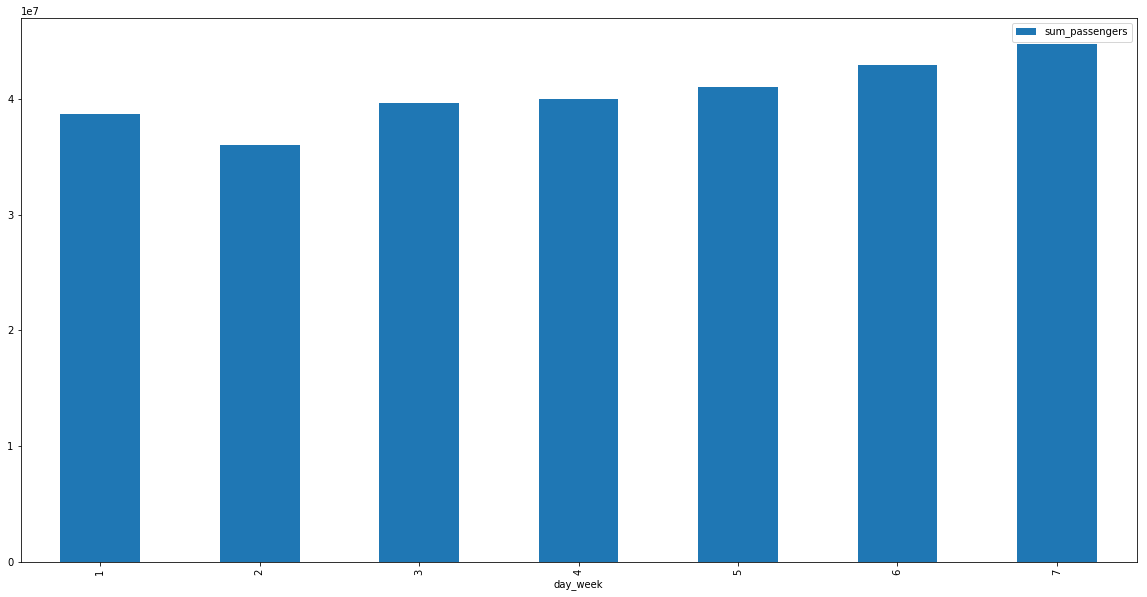

In [42]:
daysWeekPD.plot('day_week','sum_passengers',kind='bar',figsize=(20,10))

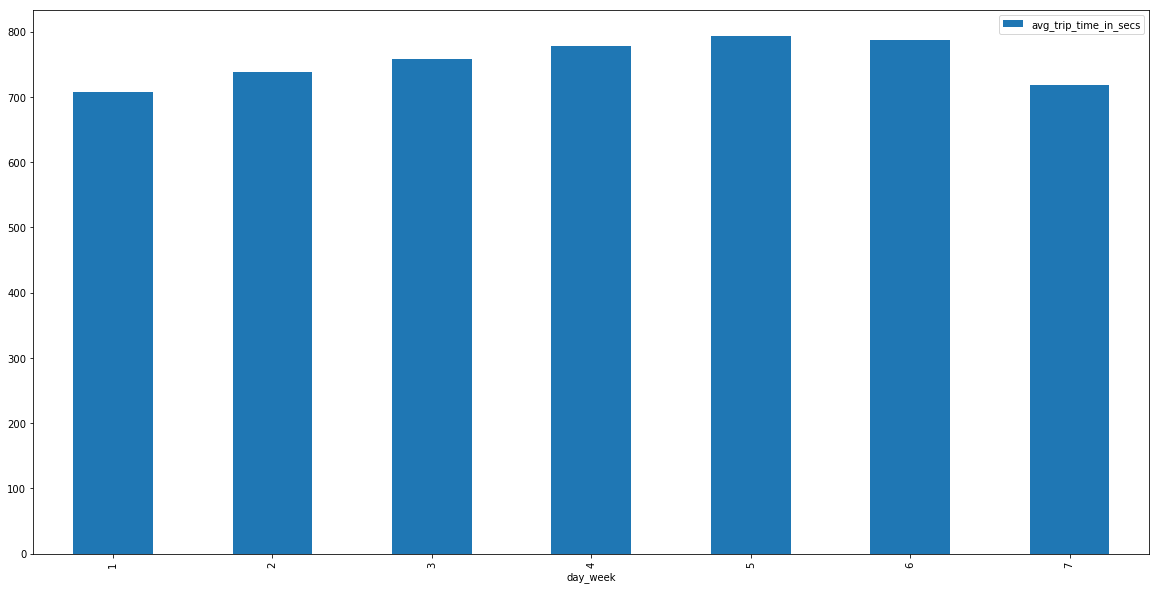

In [43]:
daysWeekPD.plot('day_week','avg_trip_time_in_secs',kind='bar',figsize=(20,10))

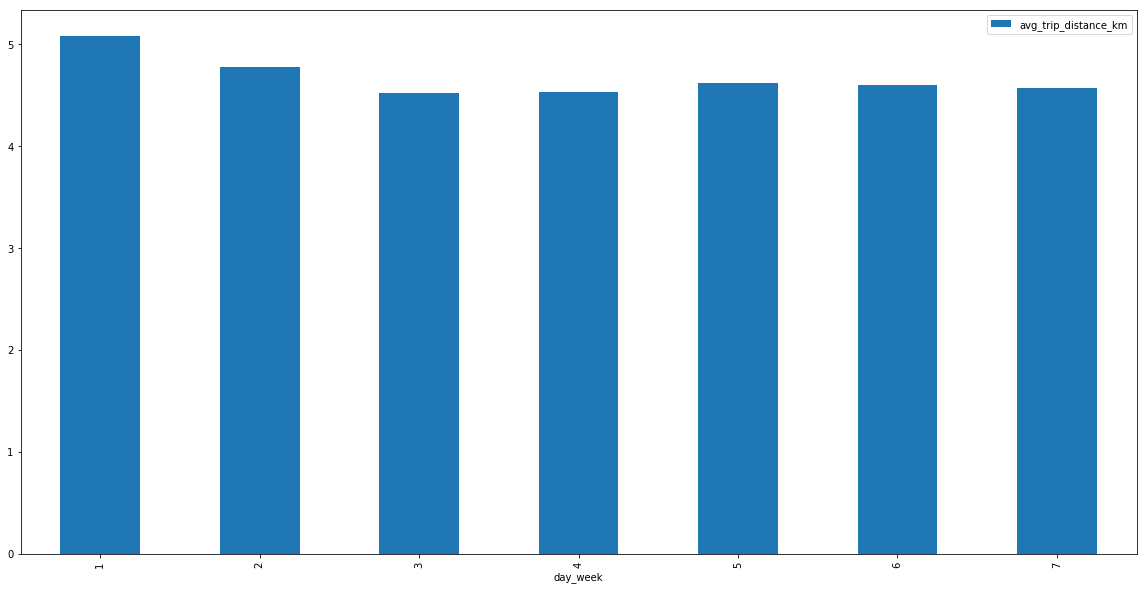

In [44]:
daysWeekPD.plot('day_week','avg_trip_distance_km',kind='bar',figsize=(20,10))

# Hour of day analysis

In [45]:
hours = spark.read.parquet("s3a://yellowspark-us-new/hourStats.df")
hoursPD = hours.orderBy('hour').toPandas()

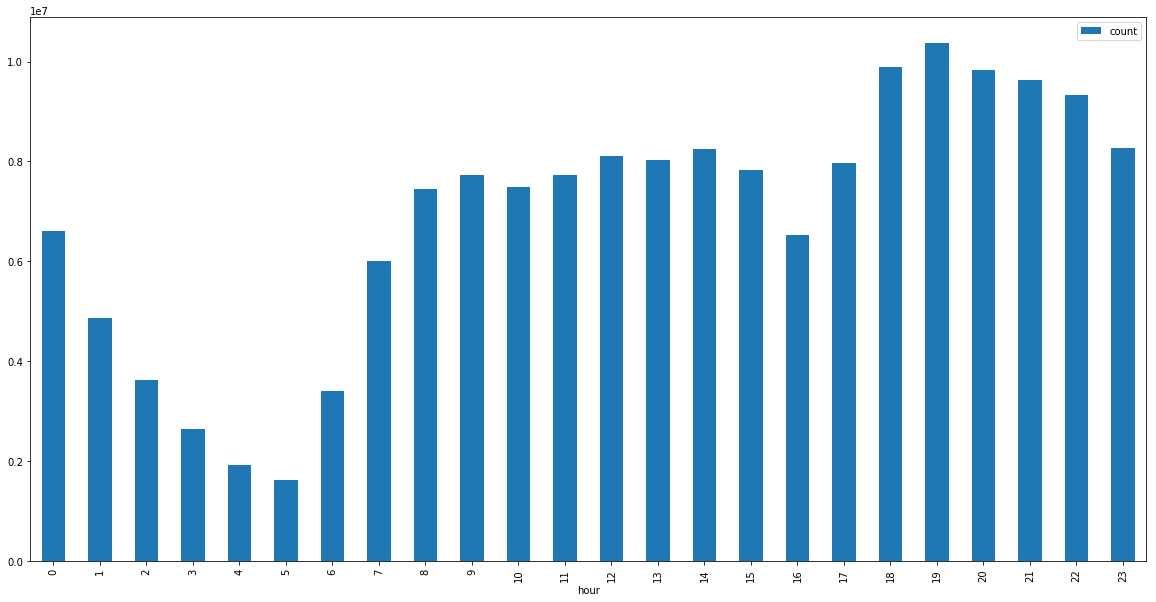

In [46]:
hoursPD.plot('hour','count',kind='bar',figsize=(20,10))

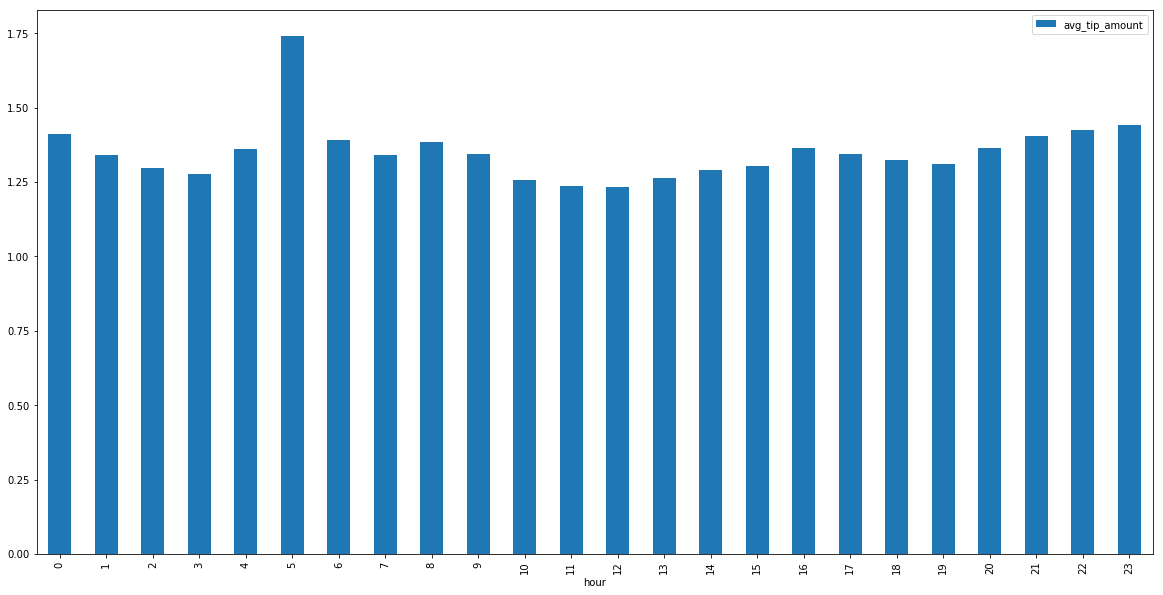

In [47]:
hoursPD.plot('hour','avg_tip_amount',kind='bar',figsize=(20,10))

# Distances analysis

In [152]:
dists = spark.read.parquet("s3a://yellowspark-us-new/distStats.df")
distsPD = dists.orderBy('distance_bin').toPandas()

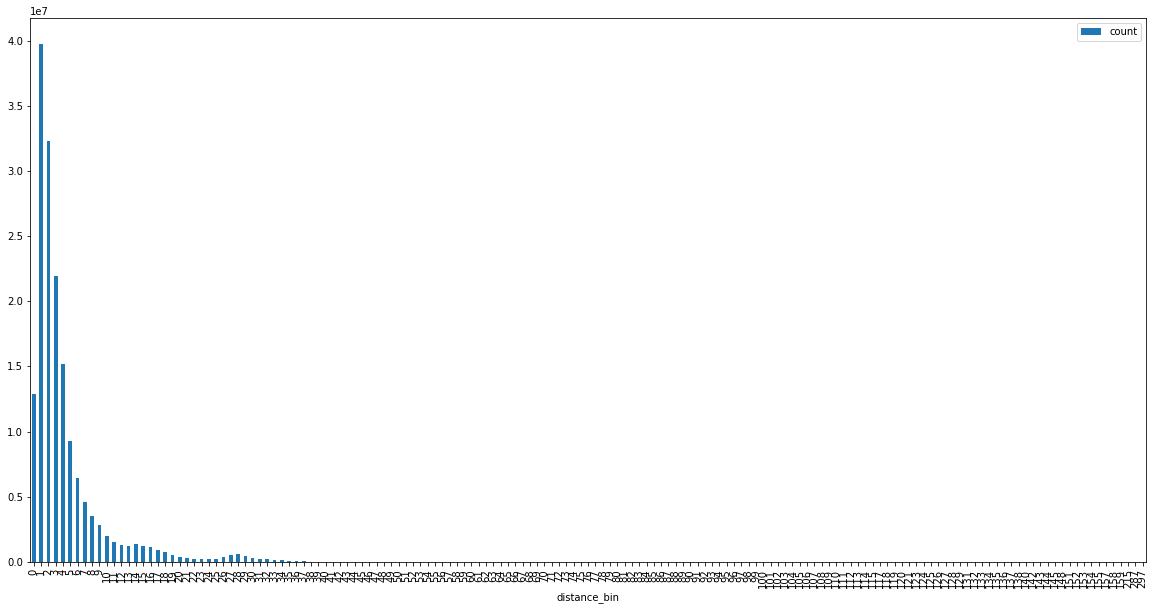

In [153]:
distsPD.plot('distance_bin','count',kind='bar',figsize=(20,10))

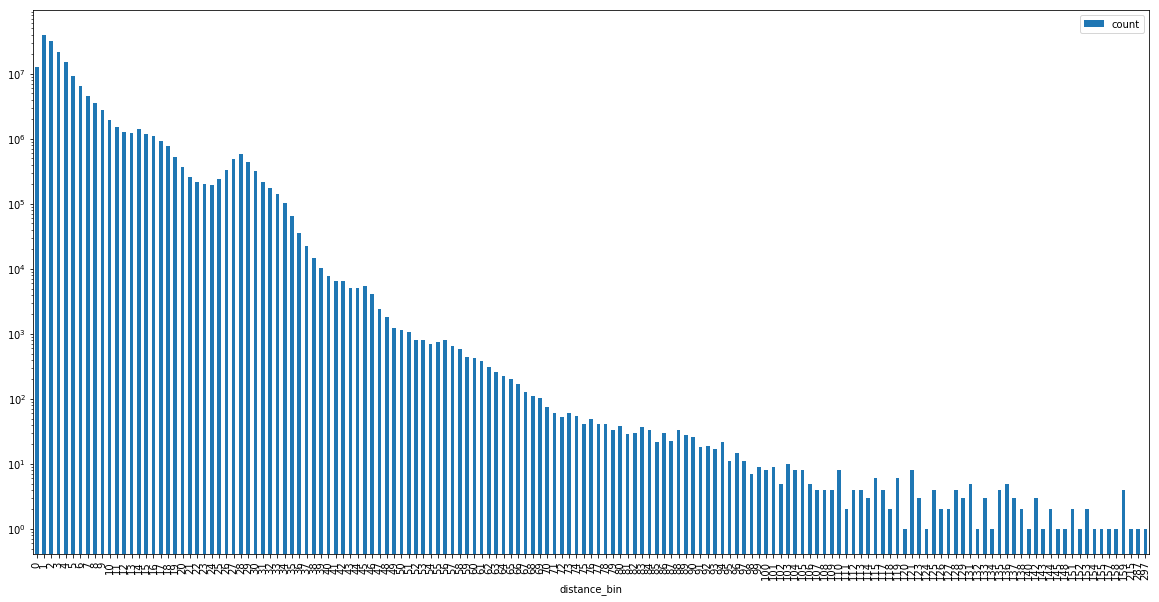

In [154]:
distsPD.plot('distance_bin','count',kind='bar',figsize=(20,10),logy=True)

In [52]:
durations = spark.read.parquet("s3a://yellowspark-us-new/durationStats.df")
durationsPD = durations.orderBy('duration_class').toPandas()

In [ ]:
durationsPD.tail()

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(80,10))
classes = durationsPD['duration_class'].values
counts = durationsPD['count'].values

plt.semilogy(classes,counts)
plt.axvline(x=24*60*60,color='red')
plt.axvline(x=12*60*60,color='red')
plt.grid(True)


In [ ]:
print(len(classes))

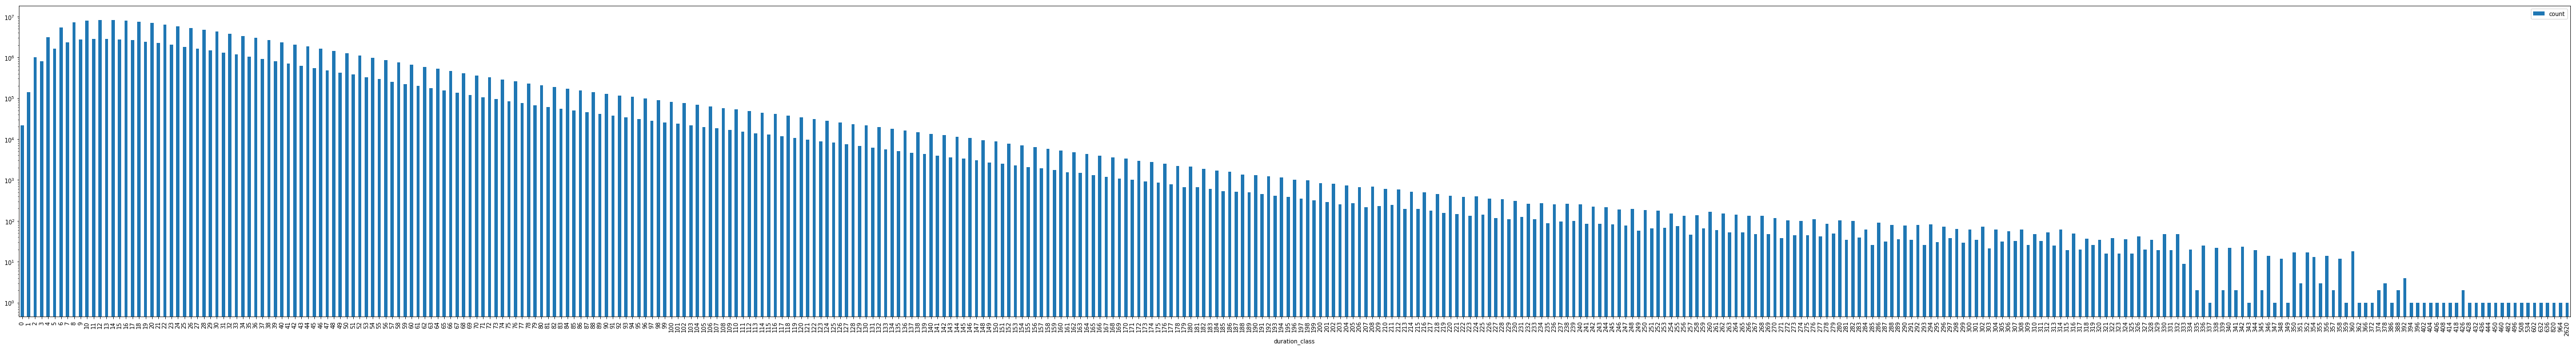

In [53]:
durationsPD.plot('duration_class','count',kind='bar',figsize=(80,10),logy=True)

In [115]:
costs = spark.read.parquet("s3a://yellowspark-us-new/fares_rate1_bins.df")
costsPD = costs.filter('fare_bin > 10').orderBy('fare_bin').toPandas()

<IPython.core.display.Javascript object>


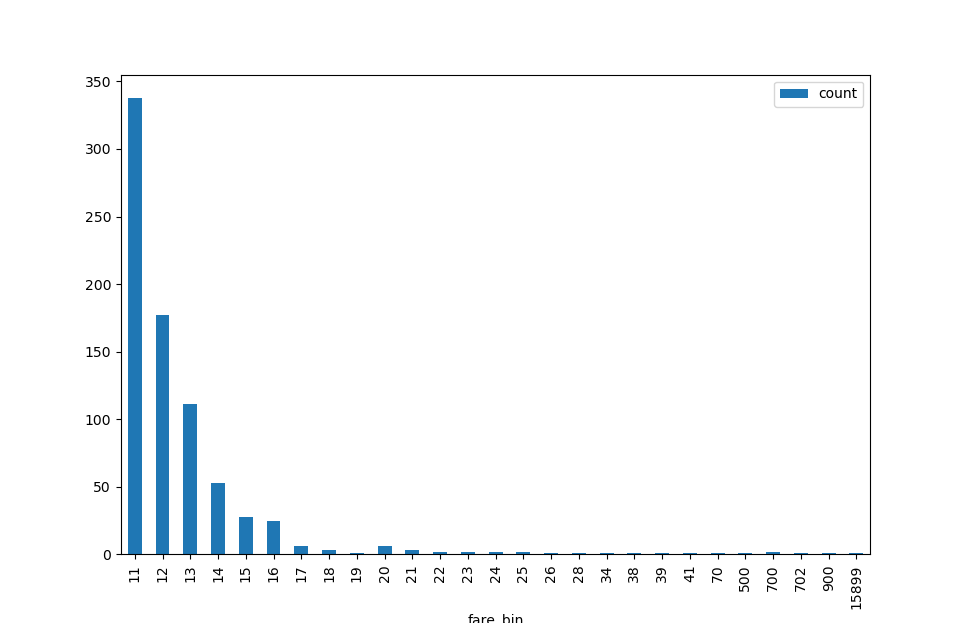

In [116]:
costsPD.plot('fare_bin','count',kind='bar')

# Linear regressions

In [136]:
predictions = spark.read.parquet("s3a://yellowspark-us-new/predictions_3.df")

In [137]:
predictions_sample_df = predictions.sample(fraction=0.2).limit(500).toPandas()

<IPython.core.display.Javascript object>


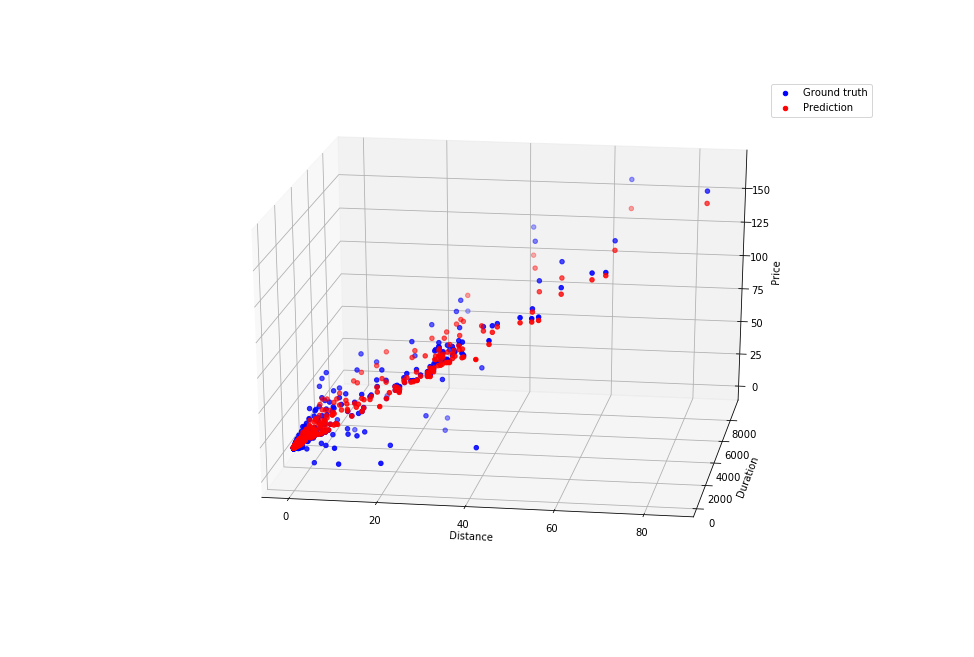

In [140]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

km = predictions_sample_df['distance'].values
duration = predictions_sample_df['duration'].values

label = predictions_sample_df['label'].values
prediction = predictions_sample_df['prediction'].values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(km,duration,label,color='blue',label="Ground truth")
ax.scatter(km,duration,prediction,color='red',label="Prediction")

ax.legend()
ax.set_xlabel('Distance')
ax.set_ylabel('Duration')
ax.set_zlabel('Price')

plt.show()

In [141]:
predictions = spark.read.parquet("s3a://yellowspark-us-new/predictions_2.df")
predictions_sample_df = predictions.sample(fraction=0.2).limit(500).toPandas()
predictions_sample_df

,cost,rate_code,duration,distance,surcharge,total_amount,tolls_amount,tip_amount,features,label,prediction
0,3.0,2,4884,27.519714,1.0,4.50,0.00,0.00,"[4884.0, 27.519714]",3.0,51.861196
1,22.5,2,2064,5.954558,0.0,23.00,0.00,0.00,"[2064.0, 5.9545580000000005]",22.5,51.035843
2,52.0,2,18,0.321868,0.0,65.83,5.33,8.00,"[18.0, 0.32186800000000004]",52.0,50.830404
3,52.0,2,45,0.643736,0.0,68.76,4.80,11.46,"[45.0, 0.6437360000000001]",52.0,50.842839
4,52.0,2,60,0.096560,0.0,63.00,0.00,10.50,"[60.0, 0.09656039999999999]",52.0,50.821227
5,52.0,2,60,0.563269,0.0,52.50,0.00,0.00,"[60.0, 0.5632689999999999]",52.0,50.839562
6,52.0,2,60,1.882928,0.0,69.30,5.33,11.47,"[60.0, 1.8829277999999998]",52.0,50.891405
7,52.0,2,61,0.160934,0.0,65.83,5.33,8.00,"[61.0, 0.16093400000000002]",52.0,50.823748
8,52.0,2,62,0.643736,0.0,52.50,0.00,0.00,"[62.0, 0.6437360000000001]",52.0,50.842707
9,52.0,2,114,1.448406,0.0,57.83,5.33,0.00,"[114.0, 1.448406]",52.0,50.873916


<IPython.core.display.Javascript object>


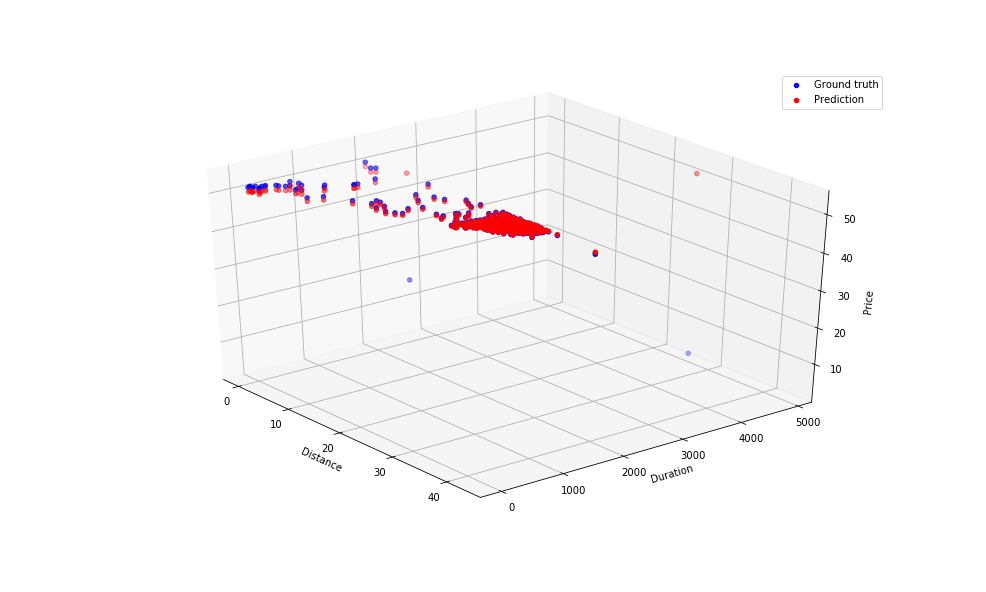

In [142]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

km = predictions_sample_df['distance'].values
duration = predictions_sample_df['duration'].values

label = predictions_sample_df['label'].values
prediction = predictions_sample_df['prediction'].values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(km,duration,label,color='blue',label="Ground truth")
ax.scatter(km,duration,prediction,color='red',label="Prediction")

ax.legend()
ax.set_xlabel('Distance')
ax.set_ylabel('Duration')
ax.set_zlabel('Price')

plt.show()

In [156]:
predictions = spark.read.parquet("s3a://yellowspark-us-new/predictions_1.df")
predictions_sample_df = predictions.sample(fraction=0.2).limit(500).toPandas()
predictions_sample_df

,cost,rate_code,duration,distance,surcharge,total_amount,tolls_amount,tip_amount,features,label,prediction
0,2.5,1,7,0.160934,0.0,3.00,0.0,0.00,"[7.0, 0.16093400000000002]",2.5,2.327150
1,2.5,1,10,0.160934,0.5,3.50,0.0,0.00,"[10.0, 0.16093400000000002]",2.5,2.344776
2,2.5,1,10,0.160934,0.5,3.50,0.0,0.00,"[10.0, 0.16093400000000002]",2.5,2.344776
3,2.5,1,16,0.160934,0.5,3.50,0.0,0.00,"[16.0, 0.16093400000000002]",2.5,2.380027
4,2.5,1,19,0.321868,0.5,3.50,0.0,0.00,"[19.0, 0.32186800000000004]",2.5,2.590554
5,2.5,1,19,0.321868,0.5,3.50,0.0,0.00,"[19.0, 0.32186800000000004]",2.5,2.590554
6,2.5,1,23,0.321868,0.5,4.50,0.0,1.00,"[23.0, 0.32186800000000004]",2.5,2.614055
7,2.5,1,25,0.160934,0.0,3.00,0.0,0.00,"[25.0, 0.16093400000000002]",2.5,2.432904
8,2.5,1,26,0.160934,0.5,3.50,0.0,0.00,"[26.0, 0.16093400000000002]",2.5,2.438779
9,2.5,1,27,0.160934,0.0,3.00,0.0,0.00,"[27.0, 0.16093400000000002]",2.5,2.444655


<IPython.core.display.Javascript object>


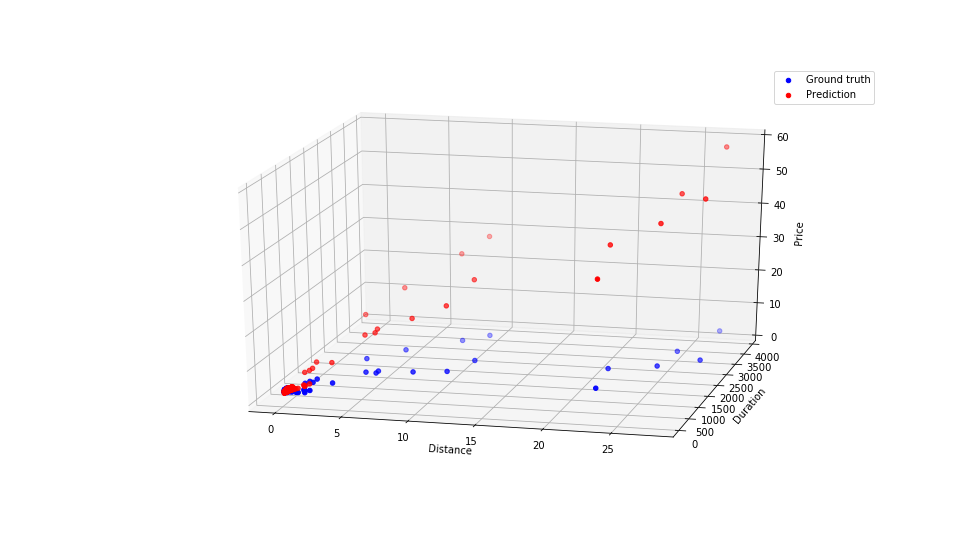

In [158]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

km = predictions_sample_df['distance'].values
duration = predictions_sample_df['duration'].values

label = predictions_sample_df['label'].values
prediction = predictions_sample_df['prediction'].values

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(km,duration,label,color='blue',label="Ground truth")
ax.scatter(km,duration,prediction,color='red',label="Prediction")

ax.legend()
ax.set_xlabel('Distance')
ax.set_ylabel('Duration')
ax.set_zlabel('Price')

plt.show()

In [94]:
linear_models = spark.read.parquet('s3a://yellowspark-us-new/linear_regression_models.df').toPandas()

In [95]:
linear_models

,rateCode,mse,formula,intercept,coeffs
0,2,4.070359,-7.742546154299769E-6 * seconds + 0.0392850184...,50.817898,"[-7.742546154299769e-06, 0.03928501845265383]"
1,4,16.970909,0.0036853443564674004 * seconds + 1.6417461173...,2.047455,"[0.0036853443564674004, 1.6417461173141132]"
2,3,56.277111,0.002939961596710377 * seconds + 1.37145488196...,20.203315,"[0.002939961596710377, 1.3714548819674637]"
3,1,1.804926,0.005861453350676983 * seconds + 1.20098096278...,2.094527,"[0.005861453350676983, 1.200980962781568]"


In [160]:
predictions_congestion = spark.read.parquet("s3a://yellowspark-us-new/predictions_congestion.df")
predictions_congestion_df = predictions_congestion.select('trip_distance_km', 'average_speed_kmh','label','prediction').sample(fraction=0.2).limit(500).toPandas()
predictions_congestion_df

,trip_distance_km,average_speed_kmh,label,prediction
0,0.160934,26.334655,22.0,194.402931
1,0.160934,22.283169,26.0,120.161067
2,0.160934,22.283169,26.0,218.424082
3,0.160934,22.283169,26.0,148.431839
4,0.160934,21.457867,27.0,196.036798
5,0.160934,20.691514,28.0,312.724255
6,0.482802,62.074543,28.0,186.967345
7,0.160934,18.689110,31.0,147.909760
8,0.160934,18.105075,32.0,106.158923
9,0.160934,18.105075,32.0,61.981581


# Wait times analysis

In [149]:
waitsDF = spark.read.parquet("s3a://yellowspark-us-new/waitTimes.df").toPandas()

In [150]:
waitsDF

,dropoff_borough,average_wait,stdDev_wait
0,Staten Island,3139.246007,2317.696141
1,Manhattan,629.480384,1072.349108
2,Brooklyn,1347.800852,1601.744704
3,Queens,2393.900715,2175.939983
4,Bronx,2042.736060,1674.669532


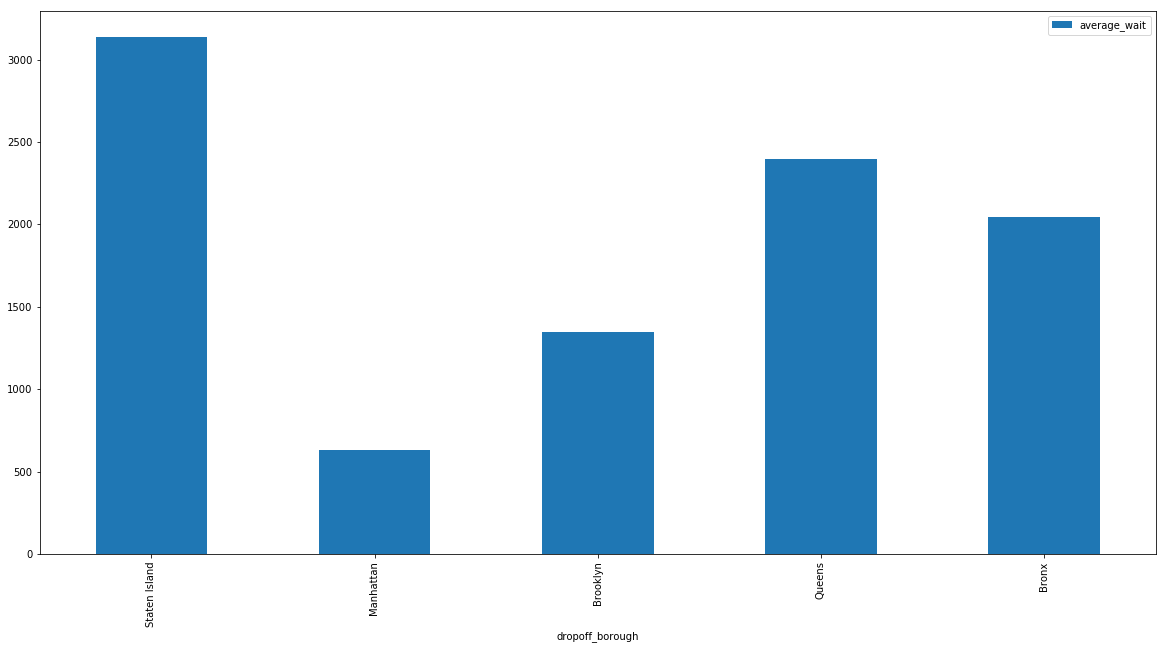

In [151]:
%matplotlib inline
waitsDF.plot('dropoff_borough','average_wait',kind='bar',figsize=(20,10))